# ***Love is Hard (and Math is too!)***

### *Una exploración sobre el problema de los matrimonios estables, su formulación, y sus características*

Realizado por:
- Leonard David Vivas Dallos
- Mariana Valencia Cubillos
- Samuel Mira Álvarez

# **SECCIÓN 1: LOS MATRIMONIOS ESTABLES, EL MECANISMO DE GALE-SHAPLEY Y LA PROGRAMACIÓN LINEAL**

El problema de los matrimonios estables, propuesto por Gale y Shapley en 1962, constituye un paradigma fundamental en teoría de juegos y optimización combinatoria. Su objetivo es emparejar elementos de dos conjuntos disjuntos, típicamente de igual cardinalidad, respetando las preferencias individuales de cada elemento. El resultado buscado debe cumplir la propiedad de estabilidad, es decir, debe evitar la existencia de pares de individuos que preferirían estar emparejados entre sí antes que con sus asignaciones actuales.

El problema tiene aplicaciones prácticas en múltiples contextos, como la asignación de médicos a hospitales, estudiantes a universidades, usuarios a servidores, entre otros. Además de la estabilidad, se han propuesto métricas adicionales para evaluar la calidad de los emparejamientos, siendo una de las más relevantes la llamada nostalgia, que mide el nivel de satisfacción individual o colectiva con las asignaciones resultantes.

## **Formulación del problema**

Sea $H = \{h_1, h_2, \dots, h_n\}$ un conjunto de hombres y $M = \{m_1, m_2, \dots, m_n\}$ un conjunto de mujeres. Cada individuo posee una lista de preferencias estrictamente ordenada sobre todos los miembros del conjunto opuesto. Dichas listas representan una relación total de orden sobre los elementos del conjunto contrario.

### Emparejamiento

Un **emparejamiento** es una función biyectiva $\mu: H \to M$, tal que cada hombre está emparejado con una única mujer y viceversa. Se dice que $\mu(h_i) = m_j$ y que $\mu^{-1}(m_j) = h_i$.

### Estabilidad

Un emparejamiento $\mu$ se considera **estable** si no existe ningún par $(h_i, m_j) \in H \times M$ tal que:

* $h_i$ prefiere a $m_j$ por sobre su pareja actual $\mu(h_i)$, y
* $m_j$ prefiere a $h_i$ por sobre su pareja actual $\mu^{-1}(m_j)$.

A este tipo de par se le denomina **par bloqueador** (*blocking pair*), y su existencia indica que el emparejamiento no es estable, pues ambos individuos tendrían incentivos para abandonar sus asignaciones actuales en favor de un emparejamiento mutuo.


## **Algoritmo de Gale-Shapley**

Gale y Shapley propusieron un algoritmo eficiente que garantiza la existencia de al menos un emparejamiento estable para cualquier instancia del problema. El algoritmo puede orientarse a favor de uno u otro conjunto, según quién realice las propuestas.

### Descripción del algoritmo (propuestas masculinas)

1. Inicialmente, todos los individuos están solteros.
2. Mientras exista un hombre soltero que no haya propuesto a todas las mujeres de su lista:

   * Elige a la mujer más preferida a la que aún no ha propuesto y le hace una propuesta.
   * Si la mujer está soltera, acepta la propuesta.
   * Si está comprometida con otro hombre, compara al nuevo proponente con su pareja actual:

     * Si prefiere al nuevo proponente, rompe el compromiso actual y acepta la nueva propuesta.
     * En caso contrario, rechaza la propuesta.
3. El proceso se repite hasta que no haya hombres solteros.

### Complejidad y propiedades

1. La complejidad del algoritmo es $O(n^2)$.
2. El resultado es siempre un emparejamiento **estable**.
3. Si los hombres realizan las propuestas, el resultado es **óptimo para los hombres**: cada hombre obtiene la mejor pareja posible entre todas las soluciones estables.
4. Simétricamente, es el **peor resultado estable para las mujeres**.



## **Métrica de nostalgia**

Aunque el algoritmo garantiza la estabilidad, no necesariamente proporciona una solución equitativa. Por ello, se han introducido métricas para evaluar el grado de satisfacción individual o colectiva. Una de las más utilizadas es la **nostalgia**, que mide cuán lejos se encuentra la pareja asignada de la preferencia ideal de cada individuo.

### Nostalgia individual

La **nostalgia individual** de un hombre $h_i$, denotada $N(h_i)$, es la posición (índice) de su pareja $\mu(h_i)$ en su lista de preferencias. De forma análoga, la nostalgia de una mujer $m_j$, denotada $N(m_j)$, es la posición de su pareja $\mu^{-1}(m_j)$ en su lista de preferencias.

Por convención, la mejor opción disponible se encuentra en la posición 1. Cuanto mayor sea el valor de nostalgia, menor es el grado de satisfacción del individuo.

### Nostalgia agregada

A partir de las nostalgias individuales se definen tres métricas globales:

* **Nostalgia masculina total**:

  $$
  N_H(\mu) = \sum_{i=1}^{n} N(h_i)
  $$

* **Nostalgia femenina total**:

  $$
  N_M(\mu) = \sum_{j=1}^{n} N(m_j)
  $$

* **Nostalgia total**:

  $$
  N_T(\mu) = N_H(\mu) + N_M(\mu)
  $$

Estas métricas permiten comparar emparejamientos estables entre sí. El emparejamiento resultante del algoritmo de Gale-Shapley (propuestas masculinas) minimiza $N_H$ pero puede maximizar $N_M$. De manera análoga, si las mujeres proponen, se minimiza $N_M$ y se perjudica $N_H$.

Existe un interés particular en encontrar emparejamientos estables con nostalgia total mínima, también conocidos como emparejamientos egalitarios, que buscan un balance entre los dos conjuntos, priorizando la equidad sobre el beneficio unilateral.

## **Formulación como Problema de Programación Lineal**

Para resolver computacionalmente el problema de los matrimonios estables, se puede modelar como un problema de **programación lineal**, en el cual se busca un emparejamiento uno a uno entre dos conjuntos disjuntos, respetando tanto las restricciones de unicidad como la **estabilidad** del emparejamiento, y minimizando una función objetivo basada en el concepto de **regret**.

### Conjuntos

Sean:

* $H = \{h_1, h_2, \dots, h_n\}$: conjunto de hombres,
* $M = \{m_1, m_2, \dots, m_n\}$: conjunto de mujeres.

### Parámetros

Se definen matrices de preferencias:

* $P^{(h)} = [p_{ij}^{(h)}] \in \mathbb{N}^{n \times n}$, donde $p_{ij}^{(h)}$ representa la posición (o rango) de la mujer $m_j$ en la lista de preferencias del hombre $h_i$,
* $P^{(m)} = [p_{ji}^{(m)}] \in \mathbb{N}^{n \times n}$, donde $p_{ji}^{(m)}$ representa la posición del hombre $h_i$ en la lista de preferencias de la mujer $m_j$.

Por convención, $1$ representa la opción más preferida y $n$ la menos preferida.

### Variables de decisión

Se definen variables binarias:

$$
x_{ij} =
\begin{cases}
1 & \text{si } h_i \text{ es emparejado con } m_j, \\
0 & \text{en otro caso}.
\end{cases}
$$

### Restricciones

 1. **Asignación única por individuo**

Cada hombre debe emparejarse con exactamente una mujer:

$$
\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i \in \{1, \dots, n\}
$$

Cada mujer debe emparejarse con exactamente un hombre:

$$
\sum_{i=1}^{n} x_{ij} = 1 \quad \forall j \in \{1, \dots, n\}
$$

 2. **Estabilidad**

Para garantizar que el emparejamiento sea estable, se debe evitar la existencia de **pares bloqueadores**. Para cada par $(h_i, m_j)$, que **no están emparejados**, se requiere que al menos uno de los dos no prefiera al otro por sobre su pareja asignada.

Formalmente, para cada $i, j$, se define:

* $B_{ij}^{(h)} = \{k \in \{1, \dots, n\} \mid p_{ik}^{(h)} < p_{ij}^{(h)}\}$: conjunto de mujeres que $h_i$ prefiere más que $m_j$,
* $B_{ji}^{(m)} = \{k \in \{1, \dots, n\} \mid p_{jk}^{(m)} < p_{ji}^{(m)}\}$: conjunto de hombres que $m_j$ prefiere más que $h_i$.

Entonces, para todo par $(i, j)$, se impone la siguiente restricción de estabilidad:

$$
\sum_{k \in B_{ij}^{(h)}} x_{ik} + \sum_{k \in B_{ji}^{(m)}} x_{kj} \geq 1
\quad \forall i,j \in \{1, \dots, n\}
$$


### Función objetivo

 1. **Regret total**

El **regret total** busca minimizar la **suma combinada** de los rangos (posiciones) de cada pareja en las listas de preferencias de ambos conjuntos. Esta métrica favorece un equilibrio global en la asignación.

$$
\min \left( \sum_{i=1}^{n} \sum_{j=1}^{n} \text{pos}_{ij}^{(h)} \cdot x_{ij} + \sum_{i=1}^{n} \sum_{j=1}^{n} \text{pos}_{ji}^{(m)} \cdot x_{ij} \right)
$$

donde:

* $\text{pos}_{ij}^{(h)}$ representa la posición de la mujer $m_j$ en la lista de preferencias del hombre $h_i$,
* $\text{pos}_{ji}^{(m)}$ representa la posición de $h_i$ en la lista de preferencias de $m_j$, y
* $x_{ij} \in \{0,1\}$ indica si $h_i$ está emparejado con $m_j$.

Esta formulación corresponde al emparejamiento **más equitativo** posible dentro del conjunto de soluciones estables.

 2. **Regret de los hombres**

El **regret de los hombres** se refiere exclusivamente al punto de vista de los proponentes. Se busca minimizar la suma de las posiciones de las mujeres asignadas en sus listas de preferencias.

$$
\min \left( \sum_{i=1}^{n} \sum_{j=1}^{n} \text{pos}_{ij}^{(h)} \cdot x_{ij} \right)
$$

Este objetivo coincide con la solución producida por el algoritmo de Gale-Shapley cuando los hombres hacen las propuestas.

 3. **Regret de las mujeres**

El **regret de las mujeres** se enfoca exclusivamente en el bienestar del conjunto receptor de las propuestas. Se minimiza la suma de las posiciones de los hombres asignados en las listas de preferencias de las mujeres.

$$
\min \left( \sum_{i=1}^{n} \sum_{j=1}^{n} \text{pos}_{ji}^{(m)} \cdot x_{ij} \right)
$$

Esta solución se obtiene, por ejemplo, cuando las mujeres hacen las propuestas en el algoritmo de Gale-Shapley.

## **Implementación en Python**

Esta implementación resuelve el problema de los matrimonios estables generando preferencias aleatorias para hombres y mujeres,
mostrando las preferencias, y utilizando tanto el algoritmo de Gale-Shapley como programación lineal (con PuLP)
para encontrar emparejamientos estables óptimos según distintas métricas de nostalgia (total, hombres, mujeres).



In [ ]:
!pip install pulp pandas networkx matplotlib typing jinja2 numpy matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.7 MB/s eta 0:00:00


Ahora importamos las librerias

In [ ]:
# Librerías importadas 1
import random
from typing import List, Dict, Tuple, Optional
import pulp
from IPython.display import display
import pandas as pd

# Librerías importadas 2
import itertools
from typing import Dict, List, Tuple, Optional
from typing import Dict, List, Tuple
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Librerías importadas 3
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch

Aquí definimos las funciones auxiliares necesarias para el problema de los matrimonios estables. Estas incluyen la generación aleatoria de preferencias, la implementación del algoritmo de Gale–Shapley, y funciones para evaluar el emparejamiento resultante, como el cálculo del arrepentimiento total y la verificación de estabilidad.

In [ ]:
def random_preferences(n: int, seed: Optional[int] = None) -> Tuple[Dict[int, List[int]], Dict[int, List[int]]]:
    rng = random.Random(seed)
    men_prefs = {i: rng.sample(range(n), n) for i in range(n)}
    women_prefs = {j: rng.sample(range(n), n) for j in range(n)}
    return men_prefs, women_prefs

def gale_shapley(men_prefs: Dict[int, List[int]], women_prefs: Dict[int, List[int]]) -> Dict[int, int]:
    n = len(men_prefs)
    free_men = list(men_prefs.keys())
    next_idx = {m: 0 for m in men_prefs}
    engaged_to: Dict[int, int] = {}
    women_rank = {w: {m: rank for rank, m in enumerate(pref)} for w, pref in women_prefs.items()}

    while free_men:
        m = free_men.pop(0)
        w = men_prefs[m][next_idx[m]]
        next_idx[m] += 1

        if w not in engaged_to:
            engaged_to[w] = m
        else:
            current = engaged_to[w]
            if women_rank[w][m] < women_rank[w][current]:
                engaged_to[w] = m
                free_men.append(current)
            else:
                free_men.append(m)

    return {m: w for w, m in engaged_to.items()}

def ranking(position_list: List[int]) -> Dict[int, int]:
    return {x: i for i, x in enumerate(position_list)}

def total_regret(match: Dict[int, int], men_prefs: Dict[int, List[int]], women_prefs: Dict[int, List[int]]) -> Tuple[int, int, int]:
    men_rank = {m: ranking(men_prefs[m])[w] for m, w in match.items()}
    women_rank = {w: ranking(women_prefs[w])[m] for m, w in match.items()}
    return sum(men_rank.values()) + sum(women_rank.values()), sum(men_rank.values()), sum(women_rank.values())

def is_stable(match: Dict[int, int], men_prefs: Dict[int, List[int]], women_prefs: Dict[int, List[int]]) -> bool:
    women_partner = {v: k for k, v in match.items()}
    women_rank = {w: ranking(pref) for w, pref in women_prefs.items()}

    for m in men_prefs:
        w_current = match[m]
        for w in men_prefs[m]:
            if w == w_current:
                break
            m_prime = women_partner[w]
            if women_rank[w][m] < women_rank[w][m_prime]:
                return False
    return True


nombres_hombres = [
    "Juan", "Andrés","Samuel", "Carlos", "Luis", "Felipe", "Santiago", "Miguel", "David", "Camilo", "Sebastián",
    "Mateo", "Tomás", "Alejandro", "Nicolás", "Daniel", "Julián", "Simón", "Esteban", "Emilio", "Manuel",
    "José", "Álvaro", "Jorge", "Iván", "Ricardo", "Fernando", "Héctor", "Diego",  "Adrián",
    "Mauricio", "Oscar", "Raúl", "Pedro", "Cristian", "Leonardo", "Ángel", "Benjamín", "Fabián", "Jairo",
    "Eduardo", "Ernesto", "Hernán", "Guillermo", "Marco", "Wilson", "Franklin", "Jhon", "Duván", "Yesid",
    "Antony", "Kevin", "Jeison", "Stiven", "Brayan", "Elkin", "Bayron", "Freddy", "Gerardo", "Henry",
    "Rubén", "Armando", "Lucas", "Ezequiel", "René", "Cristóbal", "Joel", "Rafael", "Vicente", "Abel",
    "Teófilo", "Braulio", "Darío", "Saúl", "Matías", "Alan", "Kevin", "Jonathan", "Josué", "Lorenzo",
    "Isaac", "Danilo", "Martín", "Axel", "Israel", "Edwin", "Facundo", "Gael", "Mauricio", "Nelson",
    "Orlando", "Pablo", "Ramiro", "Salvador", "Ulises", "Valentín", "Walter", "Xavier", "Yeferson", "Zaid"
]

nombres_mujeres = [
    "Camila", "Valentina", "Daniela", "Sara", "Laura", "Juliana", "Isabela", "Luciana","Mariana",  "Gabriela",
    "Emilia", "Antonella", "Paula", "Sofía", "Natalia", "Salomé", "Manuela", "Juana", "Maria", "Renata",
    "Ana", "Fernanda", "Carolina", "Vanessa", "Andrea", "Alejandra", "Tatiana", "Diana", "Luisa", "Verónica",
    "Adriana", "Estefanía", "Melissa", "Nicole", "Catalina", "Claudia", "Mónica", "Lorena", "Viviana", "Angélica",
    "Yolanda", "Patricia", "Rocío", "Carmen", "Nathaly", "Ximena", "Zulma", "Yesenia", "Gloria", "Sandra",
    "Beatriz", "Rosa", "Liliana", "Carla", "Milena", "Esther", "Nidia", "Raquel", "Lina", "Olga",
    "Amparo", "Elsa", "Flor", "Georgina", "Helena", "Inés", "Jenny", "Karen", "Leidy", "Margarita",
    "Noemí", "Oriana", "Pamela", "Queren", "Ruth", "Shirley", "Teresa", "Urania", "Valeria", "Wendy",
    "Xiomara", "Yamile", "Zulema", "Brenda", "Clara", "Delia", "Eliana", "Fabiola", "Graciela", "Hermelinda",
    "Ignacia", "Jackeline", "Katherine", "Luz", "Magaly", "Nora", "Paola", "Reina", "Silvia", "Tania"
]

def mostrar_preferencias(men_prefs, women_prefs, nombres_hombres, nombres_mujeres):
    """
    Muestra las matrices de preferencias de hombres y mujeres.
    Cada celda contiene el nombre de la persona preferida en orden.
    """
    n = len(men_prefs)

    # Preferencias de los hombres
    hombres = [nombres_hombres[i] for i in range(n)]
    mujeres = [nombres_mujeres[i] for i in range(n)]
    prefs_h_df = pd.DataFrame({
        h: [mujeres[men_prefs[i][k]] for k in range(n)]
        for i, h in enumerate(hombres)
    })
    prefs_h_df.insert(0, "Opción", [f"Opción #{k+1}" for k in range(n)])

    # Preferencias de las mujeres
    prefs_m_df = pd.DataFrame({
        m: [hombres[women_prefs[j][k]] for k in range(n)]
        for j, m in enumerate(mujeres)
    })
    prefs_m_df.insert(0, "Opción", [f"Opción #{k+1}" for k in range(n)])

    print("Preferencias de los Hombres:")
    display(prefs_h_df.style.hide(axis="index"))

    print("\nPreferencias de las Mujeres:")
    display(prefs_m_df.style.hide(axis="index"))



def mostrar_emparejamiento(match: Dict[int, int], nombres_hombres: List[str], nombres_mujeres: List[str]):
    """
    Muestra un emparejamiento como una tabla con nombres reales.
    """
    data = []
    for i, (m, w) in enumerate(match.items(), start=1):
        data.append({
            "Pareja": f"Pareja #{i}",
            "Hombre": nombres_hombres[m],
            "Mujer": nombres_mujeres[w]
        })
    df = pd.DataFrame(data)
    display(df.style.hide(axis="index"))


Ahora podemos resolver el problema de los matrimonios estables utilizando programación lineal. En esta función se define un modelo con restricciones que garantizan emparejamientos válidos y estables, y se permite optimizar el resultado según diferentes criterios: minimizar el arrepentimiento de los hombres, de las mujeres o el total combinado.



In [ ]:
def solve_sm_lp(men_prefs: Dict[int, List[int]], women_prefs: Dict[int, List[int]], objective: str = "total") -> Dict[int, int]:
    n = len(men_prefs)
    prob = pulp.LpProblem("StableMarriage", pulp.LpMinimize)
    x = {(m, w): pulp.LpVariable(f"x_{m}_{w}", cat="Binary") for m in range(n) for w in range(n)}

    for m in range(n):
        prob += pulp.lpSum(x[m, w] for w in range(n)) == 1
    for w in range(n):
        prob += pulp.lpSum(x[m, w] for m in range(n)) == 1

    man_rank = {m: {w: r for r, w in enumerate(pref)} for m, pref in men_prefs.items()}
    woman_rank = {w: {m: r for r, m in enumerate(pref)} for w, pref in women_prefs.items()}

    for m in range(n):
        for w in range(n):
            better_women = [w2 for w2 in men_prefs[m] if man_rank[m][w2] < man_rank[m][w]]
            better_men = [m2 for m2 in women_prefs[w] if woman_rank[w][m2] < woman_rank[w][m]]
            prob += (x[m, w] +
                     pulp.lpSum(x[m, w2] for w2 in better_women) +
                     pulp.lpSum(x[m2, w] for m2 in better_men)) >= 1

    if objective == "men":
        prob += pulp.lpSum(man_rank[m][w] * x[m, w] for m in range(n) for w in range(n))
    elif objective == "women":
        prob += pulp.lpSum(woman_rank[w][m] * x[m, w] for m in range(n) for w in range(n))
    else:
        prob += pulp.lpSum((man_rank[m][w] + woman_rank[w][m]) * x[m, w] for m in range(n) for w in range(n))

    prob.solve(pulp.PULP_CBC_CMD(msg=False))

    if pulp.LpStatus[prob.status] != "Optimal":
        raise RuntimeError(f"No se encontró solución óptima (status: {pulp.LpStatus[prob.status]})")

    return {m: w for (m, w), var in x.items() if var.varValue > 0.5}


Ahora podemos ejecutar los algoritmos definidos previamente. Primero generamos las preferencias aleatorias y aplicamos el algoritmo de Gale–Shapley para obtener un emparejamiento estable. Luego, comparamos este resultado con las soluciones óptimas obtenidas mediante programación lineal para diferentes criterios de optimización: minimizar el arrepentimiento total, el de los hombres y el de las mujeres.

In [ ]:
# 3. Ejecución
n = 10
men_prefs, women_prefs = random_preferences(n, seed=1)

mostrar_preferencias(men_prefs, women_prefs, nombres_hombres, nombres_mujeres)


gs_match = gale_shapley(men_prefs, women_prefs)

print("\nResultados de Gale-Shapley:")
# print("Gale–Shapley:", gs_match)
print("Estable:", is_stable(gs_match, men_prefs, women_prefs))
print("Regret (total, hombres, mujeres):", total_regret(gs_match, men_prefs, women_prefs))
mostrar_emparejamiento(gs_match, nombres_hombres, nombres_mujeres)

for obj in ["Nostalgia Total", "Nostalgia de los Hombres", "Nostalgia de las Mujeres"]:
    match = solve_sm_lp(men_prefs, women_prefs, objective=obj)
    print(f"\nLP óptimo para {obj}:")
    # print("Emparejamiento:", match)
    print("Estable:", is_stable(match, men_prefs, women_prefs))
    print("Nostalgia:", total_regret(match, men_prefs, women_prefs))
    mostrar_emparejamiento(match, nombres_hombres, nombres_mujeres)

Preferencias de los Hombres:



Preferencias de las Mujeres:



Resultados de Gale-Shapley:
Estable: True
Regret (total, hombres, mujeres): (40, 14, 26)



LP óptimo para Nostalgia Total:
Estable: True
Nostalgia: (37, 24, 13)



LP óptimo para Nostalgia de los Hombres:
Estable: True
Nostalgia: (37, 24, 13)



LP óptimo para Nostalgia de las Mujeres:
Estable: True
Nostalgia: (37, 24, 13)


## **Enumeración de Todos los Matrimonios Estables mediante Programación Lineal**
En el problema clásico de los matrimonios estables, dado un conjunto de hombres y un conjunto de mujeres, cada uno con listas de preferencias estrictas sobre los miembros del conjunto opuesto, se busca un emparejamiento biunívoco y estable: es decir, que no exista ningún par de individuos que prefieran estar emparejados entre sí más que con sus parejas asignadas.

El algoritmo de Gale–Shapley (1962) garantiza la existencia de al menos un emparejamiento estable. Sin embargo, en general existen múltiples soluciones estables. En este contexto, surge el problema de enumerar todos los emparejamientos estables posibles.

A través de técnicas de programación combinadas con formulaciones poliedrales, es posible explorar de forma sistemática el conjunto de soluciones factibles del problema, cada una correspondiente a un vértice del poliedro de los emparejamientos estables


## Representación del problema

Sea $M = \{0, 1, \dots, n-1\}$ el conjunto de hombres y $W = \{0, 1, \dots, n-1\}$ el conjunto de mujeres.

### Variables de decisión

Se define una familia de variables binarias:

$$
x_{mw} =
\begin{cases}
1 & \text{si el hombre } m \text{ está emparejado con la mujer } w, \\
0 & \text{en otro caso}.
\end{cases}
$$

El vector $x \in \{0,1\}^{n^2}$ representa un emparejamiento entre los elementos de $M$ y $W$.


### Restricciones fundamentales

Las restricciones que definen el poliedro de emparejamientos estables son las siguientes:
**Asignación válida**  
$$
\sum_{w \in W} x_{mw} = 1 \quad \forall m \in M
$$
$$
\sum_{m \in M} x_{mw} = 1 \quad \forall w \in W
$$

**Estabilidad (Vande Vate)**  
$$
x_{mw} + \sum_{w' \succ_m w} x_{mw'} + \sum_{m' \succ_w m} x_{m'w} \geq 1 \quad \forall (m,w) \in M \times W
$$


La última familia de restricciones garantiza que no existen **pares bloqueadores**: es decir, pares $(m,w)$ que prefieran estar emparejados entre sí más que con sus parejas asignadas.


### Poliedro de Vande Vate

La región factible descrita por las restricciones anteriores define un poliedro $P \subset \mathbb{R}^{n^2}$, llamado el **poliedro de matrimonios estables**, con las siguientes propiedades clave:

* Todos los **vértices** de $P$ corresponden a emparejamientos estables.
* Todo emparejamiento estable es un vértice del poliedro.
* El poliedro es **integral**: sus vértices tienen coordenadas binarias (0 o 1).

Estas propiedades garantizan que los métodos de enumeración basados en el símplex o branch-and-bound devolverán únicamente soluciones estables.


## **Enumeración completa**

Para obtener **todas las soluciones estables**, se adopta el siguiente procedimiento iterativo:

1. **Resolver** el modelo entero para obtener una solución factible $x^{(1)} \in \{0,1\}^{n^2}$.
2. **Almacenar** la solución como emparejamiento estable.
3. **Agregar una restricción de corte** que impida que el modelo vuelva a devolver esa misma solución:

   $$
   \sum_{(m,w)} (1 - x_{mw}) \cdot \mathbb{I}_{x^{(1)}_{mw}=1} + x_{mw} \cdot \mathbb{I}_{x^{(1)}_{mw}=0} \geq 1
   $$

   Esta desigualdad obliga al modelo a tomar al menos una decisión diferente.
4. Repetir desde el paso 1 hasta que no haya más soluciones óptimas.

Este enfoque se conoce como **enumeración con cortes por exclusión** (*solution enumeration via integer cuts*), y garantiza que se exploran todos los vértices factibles del poliedro.


### **Implementacion en Python**

Ahora podemos enumerar todos los emparejamientos estables posibles utilizando programación lineal. Esta función implementa un enfoque iterativo que encuentra soluciones estables una a una, agregando restricciones para excluir las ya encontradas, hasta obtener todas o alcanzar un límite definido por el usuario.


In [ ]:
def enumerar_emparejamientos_estables(
    men_prefs: Dict[int, List[int]],
    women_prefs: Dict[int, List[int]],
    max_solutions: int = None
) -> List[Dict[int, int]]:
    n = len(men_prefs)
    soluciones = []

    # Ranks para estabilidad
    man_rank = {m: {w: r for r, w in enumerate(p)} for m, p in men_prefs.items()}
    woman_rank = {w: {m: r for r, m in enumerate(p)} for w, p in women_prefs.items()}

    while True:
        prob = pulp.LpProblem("EnumerarEmparejamientosEstables", pulp.LpMinimize)
        x = {(m, w): pulp.LpVariable(f"x_{m}_{w}", cat="Binary") for m in range(n) for w in range(n)}

        # Asignación válida
        for m in range(n):
            prob += pulp.lpSum(x[m, w] for w in range(n)) == 1
        for w in range(n):
            prob += pulp.lpSum(x[m, w] for m in range(n)) == 1

        # Restricciones de estabilidad (Vande Vate)
        for m in range(n):
            for w in range(n):
                mejores_m = [w2 for w2 in men_prefs[m] if man_rank[m][w2] < man_rank[m][w]]
                mejores_w = [m2 for m2 in women_prefs[w] if woman_rank[w][m2] < woman_rank[w][m]]
                prob += (x[m, w] +
                         pulp.lpSum(x[m, w2] for w2 in mejores_m) +
                         pulp.lpSum(x[m2, w] for m2 in mejores_w)) >= 1

        # Cortes: excluir soluciones anteriores
        for match in soluciones:
            prob += pulp.lpSum(
                (1 - x[m, w]) if match[m] == w else x[m, w]
                for m in range(n) for w in range(n)
            ) >= 1

        # Dummy objetivo
        prob += 0

        # Resolver
        prob.solve(pulp.PULP_CBC_CMD(msg=False))
        if pulp.LpStatus[prob.status] != "Optimal":
            break  # no hay más soluciones

        # Extraer emparejamiento
        emparejamiento = {m: w for (m, w), var in x.items() if var.varValue > 0.5}
        soluciones.append(emparejamiento)

        # Límite opcional
        if max_solutions and len(soluciones) >= max_solutions:
            break

    return soluciones


En este ejemplo, generamos aleatoriamente las preferencias para un conjunto pequeño de participantes y utilizamos la función de enumeración para encontrar todos los emparejamientos estables posibles. Luego, mostramos cada uno de los emparejamientos encontrados junto con su representación legible.



In [ ]:
# Ejemplo

n = 5
men_prefs, women_prefs = random_preferences(n)

mostrar_preferencias(men_prefs, women_prefs, nombres_hombres, nombres_mujeres)


matches = enumerar_emparejamientos_estables(men_prefs, women_prefs)
print(f"Total de emparejamientos estables encontrados: {len(matches)}")
for i, match in enumerate(matches):
    print(f"\nEmparejamiento #{i+1}")
    mostrar_emparejamiento(match, nombres_hombres, nombres_mujeres)

Preferencias de los Hombres:



Preferencias de las Mujeres:


Total de emparejamientos estables encontrados: 1

Emparejamiento #1


## **El Problema de los Roommates**

El problema de los roommates, propuesto por **Robert W. Irving en 1985**, es una generalización del problema de los matrimonios estables, en la que **no hay una división en dos conjuntos disjuntos** (como hombres y mujeres), sino un **único conjunto de personas**, todas con preferencias sobre los demás.

Este problema modela situaciones donde se busca formar **pares mutuamente aceptables** dentro de un único grupo, como asignar compañeros de cuarto, parejas de baile, equipos de proyecto, etc.


### **Definición formal**

Sea un conjunto de $2n$ personas:

$$
P = \{p_1, p_2, \dots, p_{2n}\}
$$

Cada persona $p_i \in P$ tiene una **lista estrictamente ordenada de preferencias** sobre un subconjunto de $P \setminus \{p_i\}$, es decir, sobre los demás miembros. Las listas pueden ser completas o incompletas (preferencias parciales).

### **Emparejamiento**

Un **emparejamiento** $\mu$ es una partición de $P$ en $n$ pares disjuntos:

$$
\mu = \{ \{p_i, p_j\}, \{p_k, p_l\}, \dots \}
$$

tal que cada persona está emparejada con **exactamente una otra persona** (no consigo misma).

### **Estabilidad**

Un emparejamiento $\mu$ se considera **estable** si no existe un **par bloqueador** $(p_i, p_j)$ que cumpla:

1. $p_i$ y $p_j$ no están emparejados entre sí en $\mu$,
2. $p_j$ es preferido por $p_i$ por sobre $\mu(p_i)$,
3. $p_i$ es preferido por $p_j$ por sobre $\mu(p_j)$.

En otras palabras, si dos personas se prefieren mutuamente por sobre sus respectivas parejas, formarían un par bloqueador que haría inestable el emparejamiento.


## **Diferencias con el problema de matrimonios estables**

| Característica                | Matrimonios Estables (SMP) | Roommates (SRP)                |
| ----------------------------- | -------------------------- | ------------------------------ |
| Estructura de los conjuntos   | Dos disjuntos              | Un solo conjunto               |
| Emparejamiento                | Entre clases diferentes    | Entre cualquier par            |
| Solución estable garantizada  | Sí                         | **No siempre existe**          |
| Algoritmo de solución clásico | Gale–Shapley               | **Algoritmo de Irving**        |
| Aplicaciones típicas          | Asignación bipartita       | Compañeros, equipos, internado |


### **Algoritmo de Irving***

Irving propuso un algoritmo en dos fases que determina si existe un emparejamiento estable y, de ser así, lo construye en tiempo **polinomial $O(n^2)$**.

#### **Fase 1: Reducción de listas**

* Cada persona propone a la persona en el tope de su lista.
* La persona propuesta acepta tentativamente y rechaza al resto.
* Se eliminan pares inaceptables de las listas.
* Si alguna lista queda vacía, **no hay solución estable**.

#### **Fase 2: Eliminación de ciclos**

* Se identifican **rotaciones** (ciclos de mejora) y se eliminan.
* Se actualizan las listas para evitar pares bloqueadores potenciales.
* El proceso se repite hasta que cada lista tenga a lo sumo una persona.
* Si es así, se construye un emparejamiento estable a partir de las listas reducidas.



### **Propiedades y complejidad**

* El algoritmo de Irving es **determinista y polinomial**: $O(n^2)$.
* A diferencia del SMP, el SRP **no siempre admite solución estable**.
* Cuando existe una solución estable, el algoritmo la encuentra.
* El problema **puede extenderse** a listas incompletas, empates, o emparejamientos con cardinalidades.



### Implementación en Python del algoritmo de Irving

In [ ]:
def random_roommate_preferences(n: int, seed: Optional[int] = None) -> Dict[int, List[int]]:
    rng = random.Random(seed)
    return {i: rng.sample([j for j in range(n) if j != i], n - 1) for i in range(n)}


def mostrar_preferencias_roommates(prefs: Dict[int, List[int]], nombres: List[str]):
    """
    Muestra las listas de preferencias de los participantes en el problema de los roommates.
    """
    n = len(prefs)
    prefs_df = pd.DataFrame({
        nombres[i]: [nombres[j] for j in prefs[i]] for i in range(n)
    })
    prefs_df.insert(0, "Opción", [f"Opción #{k+1}" for k in range(n - 1)])
    print("Preferencias de los participantes:")
    display(prefs_df.style.hide(axis="index"))


def mostrar_emparejamiento_roommates(match: Dict[int, int], nombres: List[str]):
    """
    Muestra un emparejamiento del problema de los roommates con nombres.
    """
    vistos = set()
    data = []
    for i in match:
        j = match[i]
        if i < j and j not in vistos:
            data.append({
                "Participante A": nombres[i],
                "Participante B": nombres[j]
            })
            vistos.add(i)
            vistos.add(j)
    df = pd.DataFrame(data)
    display(df.style.hide(axis="index"))



def stable_roommates_irving(preferences):
    from collections import deque

    n = len(preferences)
    prefs = {i: list(preferences[i]) for i in range(n)}
    proposals = [0] * n  # Índice del próximo candidato a quien proponer
    suitors = {i: deque() for i in range(n)}  # Propuestas que ha recibido cada uno

    # Fase 1: Propuestas y reducción de listas
    free = list(range(n))
    while free:
        i = free.pop(0)
        if proposals[i] >= len(prefs[i]):
            return None  # No hay pareja posible
        j = prefs[i][proposals[i]]
        suitors[j].append(i)
        proposals[i] += 1

        # Mantener solo los dos mejores pretendientes
        if len(suitors[j]) > 1:
            # Ordenar por preferencia de j
            suitors[j] = deque(sorted(suitors[j], key=lambda x: prefs[j].index(x)))
            worst = suitors[j].pop()
            free.append(worst)

    # Recortar listas de preferencias según suitors
    for j in range(n):
        if suitors[j]:
            best = suitors[j][0]
            index = prefs[j].index(best)
            prefs[j] = prefs[j][:index + 1]
        else:
            return None

    # Eliminar de las listas de los rechazados
    for i in range(n):
        for j in list(prefs[i]):
            if i not in prefs[j]:
                prefs[i].remove(j)

    # Fase 2: Eliminación de ciclos (rotaciones)
    def find_rotation():
        visited = []
        i = next((x for x in range(n) if len(prefs[x]) > 1), None)
        if i is None:
            return None
        while i not in visited:
            visited.append(i)
            j = prefs[i][1]
            k = prefs[j][-1]
            i = k
        start = visited.index(i)
        return [(visited[t], prefs[visited[t]][1]) for t in range(start, len(visited))]

    while True:
        rotation = find_rotation()
        if not rotation:
            break
        for (i, j) in rotation:
            prefs[i].remove(j)
            prefs[j].remove(i)
            if not prefs[i] or not prefs[j]:
                return None

    # Si todos tienen exactamente una pareja, devolvemos el emparejamiento
    if all(len(prefs[i]) == 1 for i in range(n)):
        matching = {i: prefs[i][0] for i in range(n)}
        # Emparejamiento simétrico
        paired = {}
        for i in range(n):
            j = matching[i]
            if i not in paired and j not in paired:
                paired[i] = j
                paired[j] = i
        return paired

    return None


In [ ]:
# Número de personas (debe ser par)
n = 6
#seed = 42
nombres = nombres_hombres[:n]

# Generar preferencias
prefs = random_roommate_preferences(n)

# Mostrar preferencias
mostrar_preferencias_roommates(prefs, nombres)

# Resolver el problema con Irving
match = stable_roommates_irving(prefs)

# Mostrar resultados
if match:
    print("\nEmparejamiento estable encontrado:")
    mostrar_emparejamiento_roommates(match, nombres)
else:
    print("\nNo existe emparejamiento estable.")


Preferencias de los participantes:



Emparejamiento estable encontrado:




## Matrimonios Estables con Preferencias Homosexuales


El problema de los matrimonios estables con preferencias homosexuales es una generalización del clásico **problema de los matrimonios estables (SMP)**, donde **ya no se asume una separación binaria entre proponentes y receptores**, ni un sistema heteronormativo de emparejamiento.

En esta versión, **todas las personas pertenecen a un único conjunto $P$**, y cada persona puede tener preferencias arbitrarias sobre los demás, independientemente del sexo o género.

Este modelo resulta más representativo para escenarios donde se desea incluir diversidad de género, emparejamientos sin distinción estructural (por ejemplo, amistades, asignación de mentores, parejas no binarias, etc.), o relaciones simétricas.



#### Conjunto y preferencias

* Sea $P = \{p_1, p_2, \dots, p_{2n}\}$ un conjunto par de personas (puede generalizarse a cardinalidad impar si se permite dejar individuos solteros).
* Cada persona $p_i \in P$ tiene una lista de preferencias **estricta** y **completa o incompleta** sobre los demás individuos $P \setminus \{p_i\}$.

### Emparejamiento

Un **emparejamiento** es una partición de $P$ en pares disjuntos $\{p_i, p_j\}$. Es decir, una función:

$$
\mu : P \to P \quad \text{tal que} \quad \mu(p_i) = p_j \Longleftrightarrow \mu(p_j) = p_i
$$

y $\mu(p_i) \neq p_i$, para todo $p_i \in P$.

### Estabilidad

Un emparejamiento $\mu$ se dice **estable** si no existe un par $\{p_i, p_j\}$ que cumpla:

* $p_i$ prefiere a $p_j$ por sobre $\mu(p_i)$,
* $p_j$ prefiere a $p_i$ por sobre $\mu(p_j)$.

A tal par se le llama **par bloqueador**. Si existe alguno, entonces $\mu$ es inestable.


### Relación con el problema de los roommates

Este problema es **equivalente** al **problema de los roommates (Stable Roommates Problem, SRP)**, donde no hay partición entre dos conjuntos, y cada persona busca ser emparejada con otra en una relación simétrica.

**Diferencias clave con el SMP**:

* En el SMP clásico, se garantiza la existencia de una solución estable para toda instancia.
* En el SRP (y en el caso homosexual), **puede no existir ningún emparejamiento estable**.


### Algoritmo de Irving (1985) para Roommates

Este algoritmo se puede usar para determinar si existe un emparejamiento estable con preferencias homosexuales. Consta de dos fases:

**Fase 1: Reducción de listas**

* Cada persona propone sucesivamente a sus opciones más preferidas.
* Cuando alguien es rechazado por una opción, elimina esa opción de su lista.
* Si en algún momento una lista queda vacía, **no existe emparejamiento estable**.

Resultado: listas reducidas que pueden contener ciclos de preferencias mutuas.

 **Fase 2: Eliminación de ciclos**

* Se identifican ciclos de la forma:

  $$
  p_1 \to p_2, \quad p_2 \to p_3, \quad \dots, \quad p_k \to p_1
  $$

  donde cada $p_i$ apunta a su siguiente opción más preferida.
* Se eliminan ciertas parejas mutuamente aceptadas para romper los ciclos de inestabilidad.
* El proceso se repite hasta que:

  * Se encuentra un emparejamiento estable (listas de longitud 1 para todos),
  * O se determina que no existe tal emparejamiento.

### Propiedades

* **No siempre existe una solución estable**: a diferencia del problema clásico, puede haber instancias sin ningún emparejamiento libre de pares bloqueadores.

* **No hay unicidad**: si existe una solución estable, puede haber múltiples emparejamientos estables no comparables entre sí.

* **No existe estructura de retículo (lattice)**: el conjunto de soluciones estables no tiene un orden parcial bien definido como en el SMP clásico.

* **No es estrategia-proof**: los participantes pueden beneficiarse manipulando sus listas de preferencias; no existe una estrategia dominante.

* **La complejidad es polinomial en el caso básico**: el algoritmo de Irving (1985) resuelve el problema en $O(n^2)$ si las listas son completas y estrictas.

* **El problema se vuelve NP-completo** si se permiten listas incompletas, empates o restricciones adicionales.

* **No hay noción de proponentes o receptores**: todos compiten dentro del mismo conjunto, lo que elimina ventajas estructurales.


#### **Implementación en Python**

In [ ]:
import random
from typing import List, Optional

def generar_preferencias_homosexuales(n: int, seed: Optional[int] = None) -> List[List[int]]:
    """
    Genera preferencias aleatorias para n personas homosexuales (gays o lesbianas).
    Cada persona tiene una lista estricta sobre los otros n-1 individuos.
    """
    if n % 2 != 0:
        raise ValueError("El número de personas debe ser par para formar parejas.")
    rng = random.Random(seed)
    return [rng.sample([j for j in range(n) if j != i], n - 1) for i in range(n)]


import pandas as pd
from IPython.display import display

def mostrar_preferencias_homosexuales(preferencias: List[List[int]], nombres: List[str]) -> None:
    """
    Muestra las preferencias individuales en una tabla con nombres reales.
    """
    n = len(preferencias)
    df = pd.DataFrame({
        nombres[i]: [nombres[j] for j in preferencias[i]]
        for i in range(n)
    })
    df.insert(0, "Opción", [f"Opción #{k+1}" for k in range(n - 1)])
    print("Preferencias de los participantes:")
    display(df.style.hide(axis="index"))


def algoritmo_irving_homosexual(preferencias: List[List[int]]) -> Optional[List[tuple]]:
    """
    Implementa el algoritmo de Irving para encontrar un emparejamiento estable
    entre personas del mismo género.
    """
    from copy import deepcopy

    n = len(preferencias)
    pref = deepcopy(preferencias)
    proposals = [0] * n

    while True:
        estable = True
        for i in range(n):
            if proposals[i] < len(pref[i]):
                j = pref[i][proposals[i]]
                proposals[i] += 1

                if i not in pref[j]:
                    return None  # rechazo absoluto → sin solución
                pos_i = pref[j].index(i)
                for k in pref[j][pos_i + 1:]:
                    if j in pref[k]:
                        pref[k].remove(j)
                    if k in pref[j]:
                        pref[j].remove(k)
                pref[j] = pref[j][:pos_i + 1]
                estable = False
                break
        if estable:
            break

    for i in range(n):
        pref[i] = [p for p in pref[i] if i in pref[p]]
        if not pref[i]:
            return None

    def encontrar_ciclo():
        for i in range(n):
            if len(pref[i]) > 1:
                ciclo = []
                visitados = set()
                p = i
                while p not in visitados:
                    visitados.add(p)
                    q = pref[p][1]
                    r = pref[q][0]
                    ciclo.append((p, q))
                    p = r
                return ciclo
        return None

    while True:
        ciclo = encontrar_ciclo()
        if not ciclo:
            break
        for i, j in ciclo:
            if j in pref[i]:
                pref[i].remove(j)
            if i in pref[j]:
                pref[j].remove(i)
            if not pref[i] or not pref[j]:
                return None

    emparejamiento = []
    usados = set()
    for i in range(n):
        if i not in usados and pref[i]:
            j = pref[i][0]
            emparejamiento.append((i, j))
            usados.add(i)
            usados.add(j)

    return emparejamiento


def mostrar_emparejamiento_homosexual(emparejamiento: List[tuple], nombres: List[str]) -> None:
    """
    Muestra el emparejamiento final entre personas homosexuales con sus nombres.
    """
    data = []
    usados = set()
    for a, b in emparejamiento:
        if (a, b) not in usados and (b, a) not in usados:
            data.append({"Parejsa": f"{nombres[a]} y {nombres[b]}"})
            usados.add((a, b))
            usados.add((b, a))
    df = pd.DataFrame(data)
    display(df.style.hide(axis="index"))


In [ ]:
# Configurar
n = 8  # número par
tipo = "gays"  # o "lesbianas"

nombres_base = nombres_hombres if tipo == "gays" else nombres_mujeres
nombres = random.sample(nombres_base, n)

# Ejecutar simulación
preferencias = generar_preferencias_homosexuales(n)
mostrar_preferencias_homosexuales(preferencias, nombres)

emparejamiento = algoritmo_irving_homosexual(preferencias)

if emparejamiento:
    print(f"\nEmparejamientos estables entre {tipo}:")
    mostrar_emparejamiento_homosexual(emparejamiento, nombres)
else:
    print(f"\nNo existe un emparejamiento estable.")


Preferencias de los participantes:



Emparejamientos estables entre gays:


In [ ]:
# Configurar
n = 8  # número par
tipo = "lesbianas"  # o "lesbianas"

nombres_base = nombres_hombres if tipo == "gays" else nombres_mujeres
nombres = random.sample(nombres_base, n)

# Ejecutar simulación
preferencias = generar_preferencias_homosexuales(n)
mostrar_preferencias_homosexuales(preferencias, nombres)

emparejamiento = algoritmo_irving_homosexual(preferencias)

if emparejamiento:
    print(f"\nEmparejamientos estables entre {tipo}:")
    mostrar_emparejamiento_homosexual(emparejamiento, nombres)
else:
    print(f"\nNo existe un emparejamiento estable.")

Preferencias de los participantes:



No existe un emparejamiento estable.


# **SECCIÓN 2: VANDE VATE Y ROTHBLUM: EL POLIEDRO DE LOS MATRIMONIOS ESTABLES**

El problema de los **matrimonios estables** ha sido tradicionalmente abordado mediante algortimos constructivos, como el algoritmo de **Gale-Shapley**, recién abordado en la parte anterior, que nos garantiza la existencia de al menos un emparejamiento estable. Sin embargo, en 1989, **John H. Vande Vate** dio un paso crucial en el análisis de este problema al demostrar que el conjunto de todos los emparejamientos estables puede ser descrito como un **politopo**, es decir, un poliedro convexo o el conjunto de soluciones factibles de un sistema de inecuaciones lineales. El aporte más significativo de este aporte es el hecho de que los emparejamientos estables pueden encontrarse como soluciones extremas enteras del politopo definido por restricciones lineales, permitiendonos liberar la restricción implícita de condiciones de enteridad. Esto significa que, pueden aplicarse directamente métodos de programación lineal clásis (como el método del simplex) para obtener soluciones válidas y además de esto, estables.

### Definición formal del problema de los matrimonios estables

Consideremos dos conjuntos disjuntos de igual tamaño n:

- Un conjunto de hombres $ M = \{m_1, m_2, \ldots, m_n\} $
- Un conjunto de mujeres $ W = \{w_1, w_2, \ldots, w_n\} $

El problema de los **matrimonios estables** busca determinar si, dados $M, W$ existe una forma de emparejar a cada hombre con una mujer de tal forma que no existan **parejas bloqueadoras**.

Con este fin, cada persona (hombre o mujer) tiene una **lista de preferencias** que ordena a los miembros del sexo opuesto de manera estricta, de manera que, todos los posibles emparejamientos son aceptables y preferibles a no emparejarse con nadie. Denotaremos con $w \succ_m w'$ que el hombre $m$ prefiere a la mujer $w$ sobre la mujer $w'$, y de manera análoga con $m \succ_w m'$ que la mujer $w$ prefiere al hombre $m$ sobre el hombre $m'$.

Un **emparejamiento** (matching) $\mu$ es una función biyectiva $\mu: M \to W$ que asigna a cada hombre $m \in M$ una única mujer $\mu(m) \in W$ y viceversa.

Una **pareja bloqueadora** es un par de personas $(m, w) \in M \times W$ tal que:

- $w \succ_m \mu(m)$, es decir, el hombre $m$ prefiere a la mujer $w$ sobre su pareja actual $\mu(m)$.
- $m \succ_w \mu^{-1}(w)$, es decir, la mujer $w$ prefiere al hombre $m$ sobre su pareja actual $\mu^{-1}(w)$.

Cuando existe una pareja de este estilo, se dice que ambos tienen incentivos para abandonar a sus parejas actuales y emparejarse entre sí, lo que significa que el emparejamiento $\mu$ no es estable. Así, un emparejamiento es **estable** si no existen parejas bloqueadoras.

### Objetivo del trabajo de Vande Vate

El objetivo del trabajo de Vande Vate fue formular el problema de los matrimonios estables como un sistema de inecuaciones lineales, permitiendo así el uso de técnicas de programación lineal para encontrar emparejamientos estables. Y así, probar que todas las soluciones extremas de este sistema de restricciones asociado corresponden a emparejamientos estables enteros. Esa formulación, nos permite resolver el **problema de los matrimonios estables óptimos**, donde cada pareja tiene un valor social $c_{mw}$, y se desea encontrar un emparejamiento estable que maximice el valor total:

$$\max \sum_{(m,w) \in M \times W} c_{mw} x_{mw}$$

sujeto a restricciones de estabilidad y factibilidad, que aseguran un emparejamiento válido y que impiden inestabilidades.

### Modelo del problema de los matrimonios estables como un problema de programación lineal

Definamos nuestro **vector de incidencia del emparejamiento** como:
Sea $x \in \{0,1\}^{|M| \times |W|}$ una matriz de decisión binaria, tal que:

$$x_{mw} = \begin{cases}
1 & \text{si el hombre } m \text{ está emparejado con la mujer } w \\
0 & \text{en caso contrario}
\end{cases}$$

Este vector de incidencia representa completamente un emparejamiento.

#### Restricciones del modelo

- **Condiciones de emparejamiento válido (perfecto y monógamo)**:
  - Cada hombre debe emparejarse con exactamente una mujer:
    $$\sum_{w \in W} x_{mw} = 1 \quad \forall m \in M$$
  - Cada mujer debe emparejarse con exactamente un hombre:
    $$\sum_{m \in M} x_{mw} = 1 \quad \forall w \in W$$

- **Condiciones de estabilidad**:
  - Para todo par $ (m, w) \in M \times W $:

\begin{equation}
\sum_{w' \succ_m w} x_{mw'} + \sum_{m' \succ_w m} x_{m'w} + x_{mw} \geq 1
\end{equation}

Esta última condición asegura que si el hombre y la mujer no están emparejados ($x_{m,w} = 0$), entonces al menos uno de ellos debe estar emparejado con alguien que prefiere más. Esto evita la existencia de parejas bloqueadoras.
Sin embargo, usando las condiciones de emparejamiento válido, podemos simplificar esta condición a:

$$\sum_{w' \succ_m w} x_{mw'} - \sum_{m' \succ_w m} x_{m'w} \leq 0$$

- **Condiciones de no negatividad**:
  - Todas las variables de decisión deben ser no negativas:
    $$x_{mw} \geq 0 \quad \forall (m,w) \in M \times W$$
    En este caso, no se forza a que las variables sean enteras, lo que permite que el problema sea resuelto como un problema de programación lineal estándar.

Como podemos notar, esta notación puede resultar algo engorrosa a la hora de implementarla, por lo que el autor introduce una notación más compacta y manejable, aunque en ocasiones algo confusa, que es la siguiente:

- Emparejamientos de $w$ con hombre que prefiere más que $m$
$$ x(m>,w) = \sum_{i \succ_w m} x_{iw} $$
- Emparejamientos de $m$ con mujer que prefiere más que $w$
$$ x(m,>w) = \sum_{j \succ_m w} x_{mj} $$

Esto, tambien se define para intervalos de preferencias, por ejemplo, si $m$ prefiere a $w_1$ sobre $w_2$, y para el conjunto en general:
- Emparejamientos de $w$ con hombres que prefiere más que $m'$ y menos que $m$
$$ x(m'>i>m,w) = \sum_{m' \succ_w i \succ_w m} x_{iw} $$

- Emparejamientos de $m$ con mujeres que prefiere menos que $w$
$$ x(m, w>i) = \sum_{w \succ_m i} x_{mi} $$

- Emparejamientos generales:
$$ x(M, w) = \sum_{i \in M} x_{iw} $$
$$ x(m, W) = \sum_{i \in W} x_{mi} $$

Con esta notación, se puede caracterizar la estabilidad de un emparejamiento mediante un conjunto de restricciones lineales enteras más manejables:

- **Condiciones de emparejamiento válido (perfecto y monógamo)**:
  - Cada hombre debe emparejarse con exactamente una mujer:
    $$ x(M, w) = 1 \quad \forall w \in W \tag{1} $$
  - Cada mujer debe emparejarse con exactamente un hombre:
    $$ x(m, W) = 1 \quad \forall m \in M \tag{2} $$

- **Condiciones de estabilidad**:
    - Para todo par $(m,w) \in M \times W$:
    $$ x(m>,w) - x(m,>w) \leq 0 \tag{3} $$

- **Condiciones de no negatividad**:
  - Todas las variables de decisión deben ser no negativas:
    $$ x_{mw} \geq 0 \quad \forall (m,w) \in M \times W \tag{4} $$

#### Interpretación del modelo
El modelo anterior define un sistema de inecuaciones lineales que describe el conjunto de emparejamientos estables. Las restricciones $(1)$ y $(2)$ garantizan que cada hombre y cada mujer esté emparejado con exactamente una persona del sexo opuesto, mientras que la restricción $(3)$ asegura que no existan parejas bloqueadoras, es decir, que no haya incentivos para que dos personas abandonen sus parejas actuales en favor de emparejarse entre sí. La restricción $(4)$ garantiza que las variables de decisión sean no negativas, lo cual es una condición estándar en programación lineal. Luego, diremos que un vector entero $x$ es una **solución factible** del sistema si y sólo si satisface todas las restricciones $(1)$, $(2)$, $(3)$ y $(4)$.

### El politopo de los matrimonios estables

Este sistema define un politopo convexo cuyas soluciones extremas corresponden exactamente a los emparejamientos estables. Sin embargo, en general, hallar una solución entera a un conjunto de desigualdades lineales es computacionalmente ineficiente. La gran contribución de Vande Vate fue demostrar que todas las soluciones extremas del sistema son enteras, por lo que se puede resolver como un programa lineal sin restricciones de enteridad. En particular, Vande Vate demostró que cada punto extremo del sistema lineal está dado por enteros.

Más aún, notemos que las restricciones $(1)$, $(2)$ y $(4)$ definen lo que se conoce como un **politopo de emparejamiento bipartito perfecto**. Este politopo es un subconjunto convexo de $\mathbb{R}^{|M|\times|W|}$ que describe todos los emparejamientos perfectos entre dos conjuntos y que además tiene la propiedad de que "todos sus vértices (soluciones extremas) son vectores binario ($0$ o $1$)". Esto significa que todas las soluciones de vértice representan emparejamientos válidos completos, sin necesidad de forzar la restricción de enteridad.

Por otro lado, las restricciones $(3)$ y $(4)$ definen un conjunto convexo adicional que tiene estructura de cono, por lo que lo que mostraremos es que la intersección de este politopo de emparejamiento perfecto con el cono definido por las restricciones $(3)$ y $(4)$ es precisamente el politopo de los matrimonios estables, uno con puntos extremos enteros.

Sin más preámbulo, veamos cómo se puede demostrar que el conjunto de emparejamientos estables es un politopo convexo y que sus soluciones extremas son enteras.

#### Demostración

Para demostrar que el conjunto de emparejamientos estables es un politopo convexo, consideremos el conjunto de todas las soluciones factibles del sistema de inecuaciones lineales definido por las restricciones $(1)$, $(2)$, $(3)$ y $(4)$. Este conjunto es un politopo convexo porque es la intersección de un politopo convexo (el politopo de emparejamiento perfecto) con un cono convexo (el cono definido por las restricciones de estabilidad y no negatividad).

El primer elemento con el que contamos para nuestro argumento es el algoritmo de Gale-Shapley, descrito anteriormente, que nos permite hallar el emparejamiento estable **óptimo para los hombres**, pues en este algoritmo, los hombres proponen a las mujeres en orden de preferencia, las cuales aceptan o rechazan las propuestas como sigue:

##### Algoritmo 1. El algoritmo de Aceptación Diferida de Gale-Shapley

En una ronda, cada hombre $m$ propone a la mujer $w$ que prefiere más entre las que aún no lo han rechazado. Cada mujer $w$ rechaza todas las propuestas excepto la del hombre $m$ que prefiere más entre los que le han propuesto. Las rondas continúan hasta que todas las mujeres han aceptado una propuesta.

Intercambiando los roles de hombres y mujeres, podemos obtener el emparejamiento estable óptimo para las mujeres, el cual denotaremos como **Algoritmo 2**.

##### Algoritmo 2. El algoritmo de Aceptación Diferida de Gale-Shapley (versión para mujeres)

En una ronda, cada mujer $w$ propone al hombre $m$ que prefiere más entre los que aún no la han rechazado. Cada hombre $m$ rechaza todas las propuestas excepto la de la mujer $w$ que prefiere más entre las que le han propuesto. Las rondas continúan hasta que todos los hombres han aceptado una propuesta.

Al final del **Algoritmo 1**, los hombres y mujeres estarán tentativamente emparejados de acuerdo al emparejamiento estable óptimo para los hombres, denotado como $\mu_M$. De manera análoga, al final del **Algoritmo 2**, los hombres y mujeres estarán tentativamente emparejados de acuerdo al emparejamiento estable óptimo para las mujeres, denotado como $\mu_W$.

Un aspecto fundamental de este proceso es que la secuencia de propuestas y rechazos que se genera durante la ejecución del algoritmo permite identificar muchas variables del vector de incidencia que deben ser cero en toda solución factible del sistema $(1)-(4)$. En otras palabras, el comportamiento del algoritmo descarta combinaciones que violan la estabilidad, y por lo tanto restringe el espacio factible del politopo, acercando su estructura a una representación puramente entera, lo que nos lleva a introducir el sisguiente lema:

##### Lema 1.

Para cada $x \in \mathbb{R}^{|M|\times |W|}$, que satisface $(1)-(4)$, si la mujer $w$ recibe una propuesta de un hombre $m$ en el **Algoritmo 1**, entonces $x(m>,w) = 0$. Más aún, si la mujer rechaza su propuesta, entonces $x(m,w) = 0$. De manera similar, si el hombre $m$ recibe una propuesta de una mujer $w$ en el **Algoritmo 2**, entonces $x(m,w>) = 0$. Más aún, si el hombre rechaza su propuesta, entonces $x(m,w) = 0$.

**Demostración:**

Consideremos un vector $x$ que satisface las restricciones $(1)-(4)$. Supongamos además que la mujer $w$ recibe una propuesta de un hombre $m$ en la primer ronda del **Algoritmo 1**. Luego, ella es la favorita de $m$ y por tanto $x(m,>w) = 0$, trivialmente. Ahora, como $x$ satisface la restricción $(3)$, para la pareja $(m,w)$ tenemos que $x(m>, w) = 0$. Más aún, si $w$ rechaza la propuesta de $m$ en la primer ronda, es dado que $w$ recibió una propuesta de un hombre $m'$ que prefiere más que $m$, es decir, $x(m',>w) = 0$. Por lo tanto, $x(m,w) = 0$.

Un argumento análogo se puede hacer para el **Algoritmo 2**, nos muestra que si el hombre $m$ recibe una propuesta de una mujer $w$ en la primer ronda, entonces $x(m,w>) = 0$, y si rechaza la propuesta, entonces $x(m,w) = 0$.

Finalmente, procedemos por inducción sobre el número de rondas del algoritmo en que la propuesta fue recibida o rechazada, de donde nuestro lema queda demostrado.

Este resultado es fundamental porque refuerza la idea de que las decisiones operativas del algoritmo tienen un reflejo estructural dentro del espacio factible definido por el modelo lineal. Cada paso del algoritmo restringe el politopo al eliminar combinaciones inestables, lo que contribuye a demostrar la enteridad de sus vértices.

##### Listas Reducidas o "Short lists"

Lo cierto es que como sabemos, al ejecutar el algoritmo de Gale-Shapley desde el lado de los hombres y desde el lado de las mujeres, se obtienen dos emparejamientos extremos; uno óptimo para los hombres y otro óptimo para las mujeres. Al usar estos emparejamientos, es posible determinar qué pares de personas nunca podrán estar emparejados en ninguna solución estable.

Si una persona tiene una pareja que prefiere más al final de alguno de los algoritmos, entonces cualquier otra pareja inferior se descarta. Eliminando estos pares imposibles de las listas de preferencias de hombres y mujeres, se forman las **listas reducidas** o **short lists**. Estas listas contienen únicamente las parejas que aún podrían aparecer en algún emparejamiento estable.

Una propiedad interesante que podemos notar es que, en estas listas, si una persona es la primera opción de otra, entonces ella es la última opción posible para esa otra persona. Dicha asimetría refleja el equilibrio entre los intereses opuestos de los dos grupos; el emparejamiento óptimo para uno es el peor para el otro.

##### Rotaciones de las listas reducidas

En efecto, el emparejamiento $\mu_m$, obtenido asignando a cada hombre la primera mujer en su lista corta, representa la solución más favorable para los hombres y, simultáneamente, la menos favorable para las mujeres. Para que una mujer pueda aspirar a un emparejamiento más ventajoso, debe rechazar la propuesta que mantiene en $\mu_m$, desencadenando así una cadena de nuevas propuestas y rechazos.

Por ejemplo, si una mujer $w_1$ decide rechazar a $m_1$, este deberá proponerle a la siguiente mujer disponible en su lista corta, digamos $w_2$. Si $w_2$ prefiere esta nueva propuesta a su actual pareja $m_2$, entonces rechazará a $m_2$, quien a su vez repetirá el proceso, y así sucesivamente. Esta cadena puede continuar hasta que:

1. Algún hombre se quede sin opciones, o
2. Se forme un ciclo; en el que un hombre proponga a una mujer que ya había aparecido antes en la secuencia de propuestas.

Este ciclo es conocido como una **rotación** de las listas reducidas y representa un conjunto de parejas que pueden ser sustituidas por otras sin romper la estabilidad del emparejamiento. De esta forma, se puede obtener un nuevo emparejamiento estable **eliminando** la rotación.

**Definición 1.** Una **rotación** es un conjunto de parejas $\rho = \{(m_1, w_1), (m_2, w_2), \ldots, (m_r, w_r)\}$ tal que:

- Para todo $j \in \{1, 2, \ldots, r\}$, la mujer $w_j$ es la primera en la short list del hombre $m_j$.
- Para todo $j \in \{1, 2, \ldots, r-1\}$, la mujer $w_{j+1}$ es la segunda en la short list del hombre $m_j$, y para cerrar el ciclo
- La mujer $w_1$ es la segunda en la short list del hombre $m_r$.

Irving y sus colaboradores demostraron que, si cada mujer en la rotación rechaza a su pareja actual, y acepta al siguiente hombre en la secuencia inversa (por ejemplo, $w_j$ acepta a $m_{j-1}$, con índices cíclicos), el emparejamiento resultante sigue siendo estable.

Introducimos ahora el **Lema 2**, que nos ofrece una interpretación algebraica de las rotaciones: cada secuencia de rechazos y nuevas propuestas puede verse como una **operación sobre las filas** del sistema de restricciones $(1)-(4)$. Estas transformaciones permiten identificar más variables que deben ser cero en toda solución factible del modelo y, al mismo tiempo, reformulan las relaciones entre los pares de la rotación como un sistema **equivalente a un flujo en redes**.

##### Lema 2.

Considere una rotación $\rho = \{(m_1, w_1), (m_2, w_2), \ldots, (m_r, w_r)\}$ con respecto a las listas reducidas. Para cada $x$ que satisface las restricciones $(1)-(4)$, tenemos que:
- $ x(m_j, w_j) = x(m_1, w_1)$ para cada $j \in \{2, \ldots, r\}$.
- $ x(m_{j-1} > i > m_j, w_j) = 0$ para cada $j \in \{2, \ldots, r\}$.
- $ x(m_r > i > m_1, w_1) = 0$.

**Demostración:**

Por el Lema 1, tenemos,

$$x(m_r, > w_1) = x(m_r, w_r)$$

y además,

$$x(m_r>, w_1) = x(m_1, w_1) + x(m_r > i > m_1, w_1)$$

Luego, la restricción $(3)$, para el par $(m_r, w_1)$ nos dice que:

$$x(m_1, w_1) + x(m_r > i > m_1, w_1) - x(m_r, > w_r) \leq 0 \tag{5}$$

De la misma manera, para cada par $(m_{j-1}, w_j)$, para $j \in \{2, \ldots, r\}$, tenemos que:

$$x(m_j, w_j) + x(m_{j-1} > i > m_j, w_j) - x(m_{j-1}, w_{j-1}) \leq 0 \tag{6}$$

Combinando las restricciones $(5)$ y $(6)$, vemos que $x(m_r> i > m_1, w_1) = 0$ y $x(m_{j-1} > i > m_j, w_j) = 0$ para cada $j \in \{2, \ldots, r\}$ y $x(m_j, w_j) = x(m_1, w_1)$ como se quería demostrar.

Si una rotación $\rho = \{(m_j, w_j): j\in [1, ..., r]\}$ ha sido identificada en función de las listas cortas de preferencias, y la mujer $w_1$ decide rechazar la propuesta del hombre $m_1$, entonces, este lema nos dice que, se pueden actualizar las listas de preferencias de forma que cada pareja involucrada en la rotación elimine al otro si hay una alternativa que consideran preferible. Específicamente, si una mujer prefiere a su nueva pareja respecto al hombre de la propuesta rechazada, entonces se elimina a este útlimo de su lista y viceversa.

A este procedimiento le conocemos como **eliminación de la rotación** y da lugar a un nuevo conjunto de listas de preferencias, o **listas reducidas**. Gracias a esta propiedad, es posible definir de manera natural nuevas rotaciones $\rho'$ a partir de las listas reducidas resultantes, lo que genera un nuevo conjunto de listas reducidas y potencialmente nuevas rotaciones a considerar.

##### Eliminación de rotaciones y dependencia entre ellas

Cuando se identifican rotaciones en la búsqueda de emparejamientos estables, es necesario eliminar ciertas rotaciones anteriores para poder revelar otras nuevas. Por ejemplo, si una pareja $(m, w)$ fue eliminada mediante una rotación $\rho$, y existe otra rotación $\pi$ que incluye a la pareja $(m, w')$, donde $w$ es preferida por $m$ sobre $w'$, entonces es indispensable eliminar la rotación $\rho$ para que la rotación $\pi$ pueda ser correctamente idenficada. Lo mismo sucede del otro lado: si una rotación $\theta$ contiene a la pareja $(m', w)$, y $m'$ es preferido por $w$ sobre $m$, entonces la rotación $\theta$ debe ser eliminada para que pueda emerger cualquier otra rotación que involucre a $m$ con $w$.

Con el fin de manejar este tipo de dependencias, se define un conjunto de rotaciones $R$, junto con el conjunto de emparejamientos del óptimo masculino $O(\mu^M) = \{(m, \mu^M(m)): m\in M\}$, Cada pareja $(m, w)$ en $R$ se asocia a la rotación particular que la contiene, denotada como $\rho(m, w)$. Más aún, se definen dos tipos de **predecesores** de una pareja $(m, w)$ para determinar qué rotaciones deben eliminarse previamente:

- **Predecesor masculino $\rho_M(m, w)$**: Es una rotación que contiene a una pareja $(m, i)$, tal que $i$ es preferida por $m$ sobre $w$, y no existe otra rotación en $R$ que contenga a $(m, j)$ para alguna $j$ entre $i$ y $w$.

- **Predecesor femenino $\rho_W(m, w)$**: Es una rotación que contiene a una pareja $(i, w)$, tal que $m$ es menos preferido por $w$ que $i$, y no existe otra rotación en $R$ que contenga a $(j, w)$ para alguna $j$ entre $m$ y $i$.

Si la pareja $(m, w)$ sí aparece en alguna rotación del conjunto $R$, entonces ambos predecesores coinciden, es decir, $\rho_M(m, w) = \rho_W(m, w)$. Sin embargo, si la pareja $(m, w)$ no aparece en ninguna rotación del conjunto $R$, la igualdad no está garantizada. En cualquier caso, las reglas de dependencia implican que primero debe eliminarse el predecesor correspondiente antes de proceder con la rotación que involucra a la pareja $(m, w)$.

##### Lema 3.

Si algún hombre tiene más de una mujer en su lista reducida, entonces existe una rotación con respecto a las listas reducidas.

Con este resultado como base, podemos abordar la demostración de que el sistema lineal $(1)-(4)$ posee puntos extremos que son enteros. Para ello, se propone una interpretación algebraica del proceso de eliminación de rotaciones: este se puede ver como una serie de operaciones elementales por filas que transforman el sistema $(1)-(4)$ en un problema de flujo en redes equivalente.

#### Teorema 1.

Para cualquier vector $c = (c_{mw}: m \in M, w \in W)$ de valores sociales, una solución óptima de punto extremo del programa lineal:

$$$$
$$$$
$$\begin{aligned}
\max & \quad cx\\
\text{sujeto a } &\\
& x(M, w) = 1 \quad \forall w \in W\\
& x(m, W) = 1 \quad \forall m \in M\\
& x(m>, w) - x(m,>w) \leq 0 \quad \forall (m, w) \in M \times W\\
& x_{mw} \geq 0 \quad \forall (m, w) \in M \times W
\end{aligned}$$

soluciona el problema de los matrimonios estables óptimos.


**Demostración:**

Es evidente que el vector de incidencia asociado a cualquier emparejamiento estable cumple con las restricciones del sistema lineal $(1)-(4)$, y de hecho corresponde a un punto extremo del politopo definido por este sistema. Lo que se desea probar es la reciprocidad: que todo punto extremo factible de $(1)-(4)$ también representa un emparejamiento estable.

Para ello, se mostrará que el sistema $(1)-(4)$ es equivalente al dual de un problema de flujo en redes, y que la estructura combinatoria de las rotaciones permite transformar cualquier solución factible en dicho sistema en una solución de flujo entera.

Comenzamos observando, por el Lema 1, que si un par $(m, w)$ es eliminado durante las ejecuciones del Algoritmo 1 o del Algoritmo 2, entonces $x(m, w) = 0$ para cualquier $x$ factible en (1)-(4). Por lo tanto, se puede restringir el análisis a aquellas variables que no fueron eliminadas.

La estrategia consiste en construir inductivamente un problema de flujo equivalente, considerando la eliminación progresiva de rotaciones. Sea $R(k)$ el conjunto de rotaciones que pueden identificarse tras eliminar a lo sumo $k -1$ rotaciones previas. La hipótesis inductiva consiste en asumir que para todo vector factible $x$, existe un vector $y \in \mathbb{R}^{|R|}$ tal que:

- $y(\rho_0) = 1$, donde $\rho_0$ es la rotación base asociada al emparejamiento óptimo masculino $\mu_M$.
- Para cada par $(m, w)$ perteneciente a una rotación $\rho \in R(k)$, se tiene que:
$$x(m,w) = y(\rho) - y(\rho_M(m, w))$$
donde $\rho_M(m, w)$ es el predecesor masculino de la rotación $\rho$.

La base de la inducción se sustenta en el Lema 2, que muestra que para cualquier rotación inicial $\rho \in R(1)$, todos los valores $x(m_j, w_j)$ son iguales, y que los términos intermedios del tipo $x(m>m', w_j)$ son cero. Así, podemos definir $y(\rho) = x(m_j, w_j)$ para cualquier par en la rotación $\rho$, y se verifica la hipótesis para $k = 1$.

Para el paso inductivo, se analiza cómo se relacionan los valores $x$ al incorporar una nueva rotación $\rho \in R(k+1)$. De donde por hipótesis inductiva,

$$x(m_r, >w_1) = \sum (x(m_r, j): (m_r, j) \in \rho \text{ y } j>_{m_r} w_1)$$
$$ = x(m_r, w_r) + y(\rho_M(m_r, w_r)) \tag{17}$$

De manera similar,

$$x(m_r>, w_1) = \sum (x(j, w_1): (j, w_1) \in \rho \text{ y } m_r >_{w_1} j) + x(m_r > i > m:1, w_1)$$
$$ = x(m_1, w_1) + y(\rho_M(m_1, w_1)) + x(m_r > i > m_1, w_1) \tag{18}$$

Combinando $(17)$ y $(18)$ con la restricción $(3)$ para la pareja $(m_r, w_1)$, vemos que:

\begin{equation}
x(m_1, w_1) + y(\rho_M(m_1, w_1)) + x(m_r > i > m_1, w_1)
- x(m_r, w_r) - y(\rho_M(m_r, w_r)) \leq 0. \tag{19}
\end{equation}

Del mismo modo,

\begin{equation}
x(m_j, w_j) + y(\rho_M(m_j, w_j)) + x(m_{j-1} > i > m_j, w_j)
- x(m_{j-1}, w_{j-1}) - y(\rho_M(m_{j-1}, w_{j-1})) \leq 0,
\quad \text{para cada } j \in \{2, \dots, r\}. \tag{20}
\end{equation}

Combinando $(19)$ y $(20)$, vemos que:
\begin{align}
x(m_r >i > m_1, w_1) &= 0, \\
x(m_{j-1} > i > m_j, w_j) &= 0 \quad \text{para cada } j \in \{2, \dots, r\}, \\
y(\rho_M(m_1, w_1)) - y(\rho_M(m_r, w_r)) &= x(m_r, w_r) - x(m_1, w_1), \\
y(\rho_M(m_j, w_j)) - y(\rho_M(m_{j-1}, w_{j-1})) &= x(m_{j-1}, w_{j-1}) - x(m_j, w_j)
\quad \text{para cada } j \in \{2, \dots, r\}.
\end{align}

Finalmente, definiendo:
\begin{equation}
y(\rho) = x(m_r, w_r) + y(\rho_M(m_r, w_r)),
\end{equation}
es decir,
\begin{equation}
y(\rho) = x(m_r, > w_r) + x(m_r, w_r),
\end{equation}

encontramos que:
\begin{equation}
x(m_j, w_j) = y(\rho) - y(\rho_M(m_j, w_j)) \quad \text{para cada } j \in \{1, \dots, r\},
\end{equation}
lo cual prueba que para cada $x \in \mathbb{R}^{|M| \times |W|} $ que satisface $(1)-(4)$, existe un
$ y \in \mathbb{R}^{|R|} $, con $ y(\rho(\mu_F)) = 1 $, tal que se satisface:

 $(B)$ Si $ (m, w) $ pertenece a la rotación $\rho \in R$, entonces:
$$
x(m, w) = y(\rho) - y(\rho_M(m, w)).
$$
(Si $\rho_M(m, w)$ no existe, entonces se define $ y(\rho_M(m, w)) = 0 $.)

Demostramos que los puntos extremos de $(1)-(4)$ son valores enteros al mostrar que los vectores
$ y \in \mathbb{R}^{|R|} $, con $ y(\rho(\mu_F)) = 1 $, para los cuales la transformación definida por $(B)$ y,

 $(C)$ $ x(m, w) = 0 $ si $ (m, w) $ no está en ningún emparejamiento estable, genera una solución $x$ que satisface $(1)-(4)$, y que dichas soluciones son exactamente las soluciones a:

\begin{equation}
y(\rho(m, w)) - y(\rho_M(m, w)) \geq 0
\quad \text{para cada } (m, w) \in M \times W, \tag{21}
\end{equation}

\begin{equation}
y(\rho_M(m, w)) - y(\rho_W(m, w)) \geq 0
\quad \text{para cada } (m, w) \in M \times W, \tag{22}
\end{equation}

\begin{equation}
y(\rho(\mu_F)) = 1 , \quad 1 \geq y(p) \geq 0
\quad \text{para cada } p \in R. \tag{23}
\end{equation}


Consideremos un vector $y \in \mathbb{R}^{|R|} $ y definamos $ x $ según $(B)$ y $(C)$. Claramente, $ x $ es no negativo si y solo si $ y $ satisface $(13)$. Del mismo modo, por $(C)$, se tiene que:

\begin{equation}
x(m >, w) = \sum \left( x(i, w) : (i, w) \text{ está en un emparejamiento estable y } m >_w i \right).
\end{equation}

Por lo tanto,

\begin{align}
x(m >, w)
&= \sum \left( x(i, w) : (i, w) \text{ está en un emparejamiento estable y } m >_w i \right) \\
&= \sum \left( y(\rho(i, w)) - y(\rho_M(i, w)) :
(i, w) \text{ está en un emparejamiento estable y } m >_w i \right).
\end{align}


Recordemos que si $ (m, w) $ pertenece a una rotación, entonces
$ \rho_M(m, w) = \rho_W(m, w) $, y por lo tanto:

$$
x(m >, w) = y(\rho_W(m, w)),
$$

y, en particular, $ x(M, w) = 1 $.  
De manera similar, $ x(m, > w) = y(\rho_M(m, w)) $, y $ x(m, W) = 1 $.  
De lo anterior se deduce que $ x $ satisface las restricciones $(1)-(3)$ **si y solo si**
$ y $ satisface $(21)$ y $(23)$.

Dado que el sistema $(21)-(23)$ tiene puntos extremos enteros y la transformación
definida por $(B)$ y $(C)$ preserva la integralidad, se concluye que el sistema lineal
$(1)-(4)$ tiene puntos extremos enteros.

# **SECCIÓN 3: LOS RETÍCULOS (LATICES) Y LOS MATRIMONIOS ESTABLES**


Lo cierto es que, además de un poliedro, el conjunto de los matrimonios estables para un cierto conjunto de preferencias dado también se puede ver como otra estructura matemática de gran interés: Un retículo, o en inglés, *lattice* (que no sería mala idea el anglicismo latiz).

Para poder hablar de retículos, es necesario hablar primero de órdenes y de conjuntos ordenados (o parcialmente ordenados).

### Órden o Relación de Órden, Conjuntos Parcialmente Ordenados

**Definición:** Orden o Relación de Orden. Sea $P$ un conjunto. Un orden, orden parcial o relación de orden en $P$ es una relación binaria $\leq$ en $P$ tal que, para todos $x,y,z \in P$:

1.   $x \leq x$ (Reflexibidad)
2.   $x \leq y$ junto con $y \leq x$ implica $x=y$ (Antisimetría)
3.   $x \leq y$ junto con $y \leq z$ implica $x \leq z$. (Transitividad).

Un conjunto equipado con una relación de orden se llama conjunto parcialmente ordenado, conjunto ordenado (en caso de que no hayan confusiones), o *poset* (del inglés, **p**artially **o**rdered **set**).

De esta relación de orden, puede inferirse una relación $<$ de desigualdad estricta, donde $x< y$ en $P$ si y sólo si $x \leq y $ con $x \neq y$.

Además, es posible notar $x \leq y$ como $y \geq x$, y también $x \nleq y$ para decir que no es cierto que $x \leq y$. Últimamente, también se puede introducir el símbolo $||$ que denota no comparabilidad, es decir, $x||y$ si y sólo si $x \nleq y$ además de $y \nleq x$.

### El arte de dibujar conjuntos ordenados

De cierta manera, se pueden representar los conjuntos ordenados por medio de dibujos, lo que es una herramienta increíble y útil para la visualización y entendimiento de algunos de ellos y puede ser usado incluso en la prueba de teoremas.

Para introducir los diagramas, hay que primero definir el concepto de cobertura.

**Definición:** La relación de cubrimiento. Sea $P$ un conjunto ordenado, y sean $x,y \in P$. Se dice que $x$ está cubierto por $y$ (o que $y$ cubre $x$), y se escribe $x \lessdot y$ (o $y \gtrdot x$), si $x \leq y$ y que $x \leq z < y$ implica $z=x$. Note que lo que esta condición última pide es que no haya elemento en $P$ que "esté entre" $x$ e $y$, que no haya un $z$ tal que $x < z < y$.

Con esto, se puede introducir el concepto de diagrama.

**Definición:** Diagrama. Sea $P$ un conjunto ordenado finito. Se puede representar $P$ con una configuración de círculos (que representan los elementos de $P$) y lineas interconectadas (que indican la relación de cobertura). La construcción se hace de la siguiente manera:

1. Para cada punto $x\in P$, se asocia un punto $p(x)$ del plano Euclidiano $\mathbb{R}^2$, y se muestra con un pequeño círculo con centro en $p(x)$.
2. Para cada par de cobertura $x \lessdot y$ en $P$, se toma un segmento de línea $l(x,y)$ que junte el círculo centrado en $p(x)$ con el círculo centrado en $p(y)$.
3. Los pasos (1) y (2) deben seguir las siguientes condiciones:

    (a) Si $x \lessdot y$, entonces $p(x)$ debe estar más abajo que $p(y)$ (su segunda coordenada debe ser estrictamente menor);
    
    (b) El círculo en $p(z)$ no intersecta la línea $l(x,y)$ si $z \neq x$ y $z \neq y$.

Una configuración que satisface las condiciones de la (1) a la (3) se llama un diagrama o diagrama de Hasse de $P$.

### La dualidad en los conjuntos ordenados

A manera de curiosidad, también se puede ver que en el concepto de conjuntos ordenados, también hay cierta dualidad.

**Definición:** El dual de un conjunto ordenado. Dado un conjunto ordenado $P$, se puede formar un conjunto ordenado nuevo $P^{\partial}$, llamado el dual de $P$, haciendo que se cumpla $x \leq y$ en $P^{\partial}$ si y sólo si $y \leq x$ se cumple en $P$. Para $P$ finito, se puede obtener un diagrama para $P^{\partial}$ volteando el diagrama que se tiene para $P$.

De esta definición, se infiere un principio muy importante, además de interesante.

**El Principio de Dualidad.** Dada una afirmación $\Phi$ sobre los conjuntos ordenados que es cierto para todos los conjuntos ordenados, la afirmación dual $\Phi ^{\partial}$ también es cierta en todos los conjuntos ordenados.

Para hacer un ejemplo básico sobre este principio, también introducimos un concepto que va a ser importante al hablar de retículos.

**Definición:** Fondo y Tapa. Sea $P$ un conjunto ordenado. Se dice que $P$ tiene un elemento inferior si existe $\bot \in P$, llamado fondo, mínimo o cero, con la propiedad de que $\forall x \in P$, $\bot \leq x$. Dualmente, $P$ tiene un elemento superior si existe $\top \in P$, llamado tapa, máximo o unidad, que cumple que $\forall x \in P$, $x \leq \top$.

Una simple instancia del Principio de Dualidad es que la afirmación "$\bot$ es único cuando existe" tiene su versión dual, la afirmación "$\top$ es único cuando existe", y ambas son ciertas por la antisimetría de $\leq$.

### Los retículos (Por fin)

Los retículos se conforman a partir del hecho de que muchas de las propiedades importantes de los conjuntos ordenados se expresan en términos de cotas superiores e inferiores de subconjuntos de estos. Por ello, es necesario introducir más definiciones antes de definir un retículo.

**Definición: **Cota superior e inferior. Sea $P$ un conjunto ordenado y sea $S \subseteq P$. Un elemento $x \in P$ es una cota superior en $S$ si $s \leq x$ para todo $s \in S$. Una cota inferior es definida dualmente. El conjunto de todas las cotas superiores de $S$ se denota $S^{u}$ y el de todas las cotas inferiores, $S^{l}$.
$$
S^{u} := \{ x \in P \ | \ (\forall s \in S), s \leq x \}
\\
S^{l} := \{ x \in P \ | \ (\forall s \in S), s \geq x \}
$$

Si $S^{u}$ tiene un mínimo elemento $x$, entonces $x$ se llama la mínima cota superior de $S$ o el supremo de $S$, denotado $sup(S)$. Equivalentemente, $x$ es la mínima cota superior de $S$ si
1. $x$ es una cota superior de $S$; y
2. $x \leq y$ para todas las cotas superiores $y$ de $S$.
Dualmente, si $S^{l}$ tiene elemento máximo $x$, entonces a $x$ se le denomina la máxima cota inferior o ínfimo, denotado $inf(S)$.

En otras palabras, se puede decir que si algún conjunto ordenado $P$ tiene tapa $\top$, entonces claramente $sup(P) = \top$; y dualmente, si $P$ tiene fondo $\bot$ entonces $inf(P) = \bot$.

**Notación:** *Join & Meet*. Se nota $x \vee y$ (y en inglés, se dice "$x$ *join* $y$") a la expresión $sup\{x,y\}$, cuando existe, y $x \wedge y$ (y en inglés, se dice "$x$ *meet* $y$") a la expresión $inf(x,y)$, si existe. Es decir, se pregunta por el supremo y el ínfimo del conjunto conformado por esos dos elementos. Además, se escribe $\lor S$ y $\land S$ en lugar de $sup(S)$ e $inf(S)$ cuando estos existen.

**Definición:** Retículo. Sea $P$ un conjunto ordenado no vacío.
1. Si $x \vee y$, $x \wedge y$ existen para todos $x,y \in P$, entonces $P$ se llama un retículo.
2. Si $\lor S$, $\land S$ existen para todo $S \subseteq P$, entonces $P$ se dice que es un retículo completo.

Es de notar que, si se tiene que $x \leq y$ en un conjunto ordenado $P$ cualquiera, entonces $x \vee y = y$ y $x \wedge y = x$.

Otra cosa interesante sobre los retículos es que, desde un punto de vista alternativo, se pueden ver como estructuras algebraicas con las operaciones *join* y *meet*.

**Definición:** Retículo distributivo. Se dice que el retículo $L$ es distributivo si satisface la ley distributiva,
$$
(\forall a,b,c \in L) \quad a \wedge (b \vee c ) = (a \wedge b) \vee (a \wedge c)
$$

### El retículo de los matrimonios estables

Ya se ha mostrado que se puede llegar a por lo menos una instancia de matrimonio estable, dado un conjunto de preferencias, con el mecanismo de Gale-Shapley. Sin embargo, en general, hay más de una solución al problema, es decir, hay más otras configuraciones que generan matrimonios estables. ¡El conjunto de todos estos emparejamientos estables formará un retículo distributivo!

Primero, se extiende la noción de preferencia para que aplique también a los emparejamientos al igual que a los individuos. Entonces, la persona $x$ se dice que prefiere un matrimonio $M$ comparado a un matrimonio $M'$ si $x$ prefiere su pareja en $M$ que a su pareja en $M'$. Esta preferencia es estricta. Dados dos matrimonios estables, $M$ y $M'$, una persona $x$ puede preferir $M$ a $M'$, $M'$ a $M$, o ser indiferente, en caso de que la pareja en ambas configuraciones sea la misma.

Se introduce un teorema que indica cierta relación entre las preferencias de los hombres y de las mujeres.

**Teorema.** Sean $M$ y $M'$ matrimonios estables, y suponga que $m$ y $w$ son pareja en $M$ pero no en $M'$. Entonces, alguno entre $m$ y $w$ prefiere $M$ a $M'$ y el otro prefiere $M'$ a $M$.

Para una instancia de preferencias, se define la relación de dominancia (orientada hacia las mujeres) así: El emparejamiento estable $M$ se dice que domina al emparejamiento estable $M'$, denotado $M \preceq M'$, si toda mujer tiene una pareja al menos tan buena en $M$ como en $M'$, es decir, si toda mujer prefiere $M$ a $M'$ o es indiferente entre ellos. Se puede definir la dominación estricta, que se escribe $M \prec M'$, que se cumple si $M \preceq M'$ y $M \neq M'$.

De ahora en adelante, se notará $\mathbb{M}$ para representar el conjunto de todos los emparejamientos estables para una instancia de preferencias. Es fácil ver que la relación de dominancia es un orden en $\mathbb{M}$, y por tanto, lo hace un conjunto ordenado con esta relación, denotado por $(\mathbb{M}, \preceq)$. Además, el dual de este conjunto ordenado será con la relación de dominancia orientada hacia los hombres.

Si se define $M \vee M'$, el *join* de $M$ y $M'$, como la operación donde a cada mujer se le asigna su mejor pareja, entonces se puede mostrar que esta operación no sólo produce un emparejamiento (es decir, que a cada mujer le toca un hombre), sino que además es un emparejamiento estable. De igual manera, si se define el *meet* de $M$ y $M'$, $M \wedge M'$, como el proceso en donde se le da a cada mujer su peor pareja entre $M$ y $M'$, se puede ver que se llega a un emparejamiento estable.

Con estas operaciones de *join & meet*, se puede mostrar que el conjunto ordenado $(\mathbb{M}, \preceq)$ es un retículo distributivo.

Dado que el conjunto $\mathbb{M}$ es un retículo distributivo, entonces se tomará la oportunidad de mostrar cómo sería el diagrama de Hasse para una instancia específica de preferencias.

Se desea mostrar que el número de emparejamientos estables para una instancia específica de preferencias crece, en los peores casos, de manera exponencial, y por tanto, que un algoritmo que busque todos los emparejamientos estables a fuerza bruta, tomará por lo menos tiempo exponencial.

### Código para generar el diagrama de Hasse

Se comienza siempre por lo primero: Se deben definir las listas de preferencias de hombres y mujeres para una instancia de matrimonio estable. En este caso, en lugar de usar una instancia aleatorizada, es de interés ver ciertas listas de preferencias que generan una gran cantidad de posibles emparejamientos estables.


Se hará uso de la matriz latina de clasificación o matriz latina de rankeamiento (en inglés, *Latin ranking matrix*), un tipo especial de matriz que se crea a partir del subproblema del matrimonio estable llamado el **matrimonio latino**. En este subproblema, se pide que, en una instancia de tamaño $n$, el ranking que le se dan un hombre y una mujer sumen n+1. O, dicho de otra manera, si un hombre prefiere a una mujer de primera opción (está en la posición 1), la mujer correspondiente debe preferirlo de último (está en la posición n de su lista de preferencias). Este número es el ranking, y la suma de estos dos términos daría n+1.

Para claridad, en el siguiente código se identifican tanto hombres como mujeres como índices del 0 a n-1.

In [ ]:
men_prefs = {}
women_prefs = {}

# Matriz de rankeamiento latina
latin_rank_matrix = [[0, 1, 2, 3, 4, 5, 6, 7],
                     [1, 0, 3, 2, 5, 4, 7, 6],
                     [2, 3, 0, 1, 6, 7, 4, 5],
                     [3, 2, 1, 0, 7, 6, 5, 4],
                     [4, 5, 6, 7, 0, 1, 2, 3],
                     [5, 4, 7, 6, 1, 0, 3, 2],
                     [6, 7, 4, 5, 2, 3, 0, 1],
                     [7, 6, 5, 4, 3, 2, 1, 0]]

n = len(latin_rank_matrix)
for i in range(n):
    men_prefs[i] = latin_rank_matrix[i][:]

for i in range(n):
    women_prefs[i] = [n-1-j for j in men_prefs[i]]

# Mostrar las listas de preferencias de Hombres y mujeres
mostrar_preferencias(men_prefs, women_prefs, nombres_hombres, nombres_mujeres)

# Numéricamente
print("\nPreferencias de los Hombres:")
for e in men_prefs:
    print(men_prefs[e])
print("\nPreferencias de las Mujeres:")
for e in women_prefs:
    print(women_prefs[e])

Preferencias de los Hombres:



Preferencias de las Mujeres:



Preferencias de los Hombres:
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 3, 2, 5, 4, 7, 6]
[2, 3, 0, 1, 6, 7, 4, 5]
[3, 2, 1, 0, 7, 6, 5, 4]
[4, 5, 6, 7, 0, 1, 2, 3]
[5, 4, 7, 6, 1, 0, 3, 2]
[6, 7, 4, 5, 2, 3, 0, 1]
[7, 6, 5, 4, 3, 2, 1, 0]

Preferencias de las Mujeres:
[7, 6, 5, 4, 3, 2, 1, 0]
[6, 7, 4, 5, 2, 3, 0, 1]
[5, 4, 7, 6, 1, 0, 3, 2]
[4, 5, 6, 7, 0, 1, 2, 3]
[3, 2, 1, 0, 7, 6, 5, 4]
[2, 3, 0, 1, 6, 7, 4, 5]
[1, 0, 3, 2, 5, 4, 7, 6]
[0, 1, 2, 3, 4, 5, 6, 7]


Es posible demostrar el siguiente teorema:

**Teorema.** Para cada $n \geq 0$, $n$ siendo una potencia de 2, hay una instancia de matrimonio estable de tamaño $n$ que admite por lo menos $2^{n-1}$ emparejamientos estables.

Más que la prueba de este teorema, es de interés mirar que, a medida que crece el número de individuos, habrá una instancia de preferencias donde el número de emparejamientos estables crece exponencialmente. Es decir, este teorema de una cota inferior para el número máximo de emparejamientos estables, que en la literatura se le da el nombre $f(n)$. Como curiosidad, este resultado da un estimado muy holgado, por debajo, del verdadero número máximo de emparejamientos estables. Aunque no se quedará como curiosidad, ya se verá el por qué.

Ahora, se hace una búsqueda de fuerza bruta para encontrar todos los emparejamientos estables de una instancia de matrimonio estable.

In [ ]:
# Búsqueda de emparejamientos estables por fuerza bruta
def brute_force_matching(n, men_prefs, women_prefs):
    perm = list(itertools.permutations([i for i in range(n)]))
    stable_matchings = []
    for permu in perm:
        matching = {i: permu[i] for i in range(n)}
        if is_stable(matching, men_prefs, women_prefs):
            stable_matchings.append(matching)

    return stable_matchings

stable_matchings = brute_force_matching(n, men_prefs, women_prefs)

Una vez calculados todos los matrimonios estables, se tienen todos los nodos del diagrama de Hasse. ¡Qué fácil! (Aunque no para el computador).

Sin embargo, demás de nodos o círculos, el diagrama de Hasse contiene líneas. Es ahora donde se debe usar toda esa teoría de conjuntos ordenados y retículos. Es necesario definir la función de cubrimiento, pues para dibujar una línea entre dos nodos, se tiene que cumplir que uno de ellos cubre al otro. Para la relación de cubrimiento, sin embargo, es necesario la relación de orden. Como se había definido antes, el orden que hace del conjunto $\mathbb{M}$ un *poset* es la relación de dominancia. Se define eso primero, y con orientación hacia las mujeres (es decir, $M$ domina sobre $M'$ si las mujeres prefieren a sus parejas en $M$ que en $M'$).

In [ ]:
# Relación de dominancia (orientada a mujeres)
# Se pregunta si mtch1 domina sobre mtch2
def dominance(mtch1, mtch2, men_prefs, women_prefs):
    n = len(men_prefs)
    trunc_match1 = {w: m for m,w in mtch1.items()}
    trunc_match2 = {w: m for m,w in mtch2.items()}

    women_rank = {w: ranking(pref) for w, pref in women_prefs.items()}

    for w in range(n):
        m_1 = trunc_match1[w]
        m_2 = trunc_match2[w]
        if women_rank[w][m_1] < women_rank[w][m_2]:
            return False
    return True

A pesar de ya tener los nodos del diagrama, aún falta la función que les da una coordenada en el plano cartesiano. Lo más interesante a calcular es la altura, la siguiente función se encarga de ello.

In [ ]:
# Calcular altura de los nodos
def calculate_height(stable_matchings, men_prefs, women_prefs):
    heights = {}
    for i in range(len(stable_matchings)):
        cont = 0
        for j in range(len(stable_matchings)):
            if i != j:
                if dominance(stable_matchings[i], stable_matchings[j], men_prefs, women_prefs):
                    cont += 1
        heights[i] = cont
    return heights

heights = calculate_height(stable_matchings, men_prefs, women_prefs)

Con esto, ya se puede hacer definir la relación de cubrimiento.

In [ ]:
# Función para generar un diccionario que dicta qué nodo cubre a qué nodos
def cubrimiento(stable_matchings, men_prefs, women_prefs):
    cvr = {i : [] for i in range(len(stable_matchings))}
    for i in range(len(stable_matchings)):
        for j in range(len(stable_matchings)):
            if i!= j and dominance(stable_matchings[i], stable_matchings[j], men_prefs, women_prefs):
                if cvr[i] == []:
                    cvr[i].append(j)
                else:
                    incmp = True
                    elim = []
                    for k in range(len(cvr[i])):
                        if dominance(stable_matchings[cvr[i][k]], stable_matchings[j], men_prefs, women_prefs):
                            incmp = False
                            break
                        else:
                            if dominance(stable_matchings[j], stable_matchings[cvr[i][k]], men_prefs, women_prefs):
                                elim.append(cvr[i][k])
                    if incmp:
                        cvr[i].append(j)
                        if elim != []:
                            for elem in elim:
                                cvr[i].remove(elem)
    return cvr

cvr = cubrimiento(stable_matchings, men_prefs, women_prefs)

Ya con la relación de cubrimiento, es posible generar las líneas del diagrama de Hasse.

In [ ]:
# Función para generar las líneas del diagrama
def graph_edges(stable_matchings, cvr, men_prefs, women_prefs):
    edges = []
    for i in range(len(stable_matchings)):
        for j in range(len(cvr[i])):
            edges.append(tuple([i,cvr[i][j]]))

    dict_heights = {}
    for i in range(len(stable_matchings)):
        if heights[i] not in dict_heights:
            dict_heights[heights[i]] = [i]
        else:
            dict_heights[heights[i]].append(i)

    return edges, dict_heights

Ya con todos los ingredientes preparados, se puede tranquilamente crear el gráfico y manipularlo al gusto.

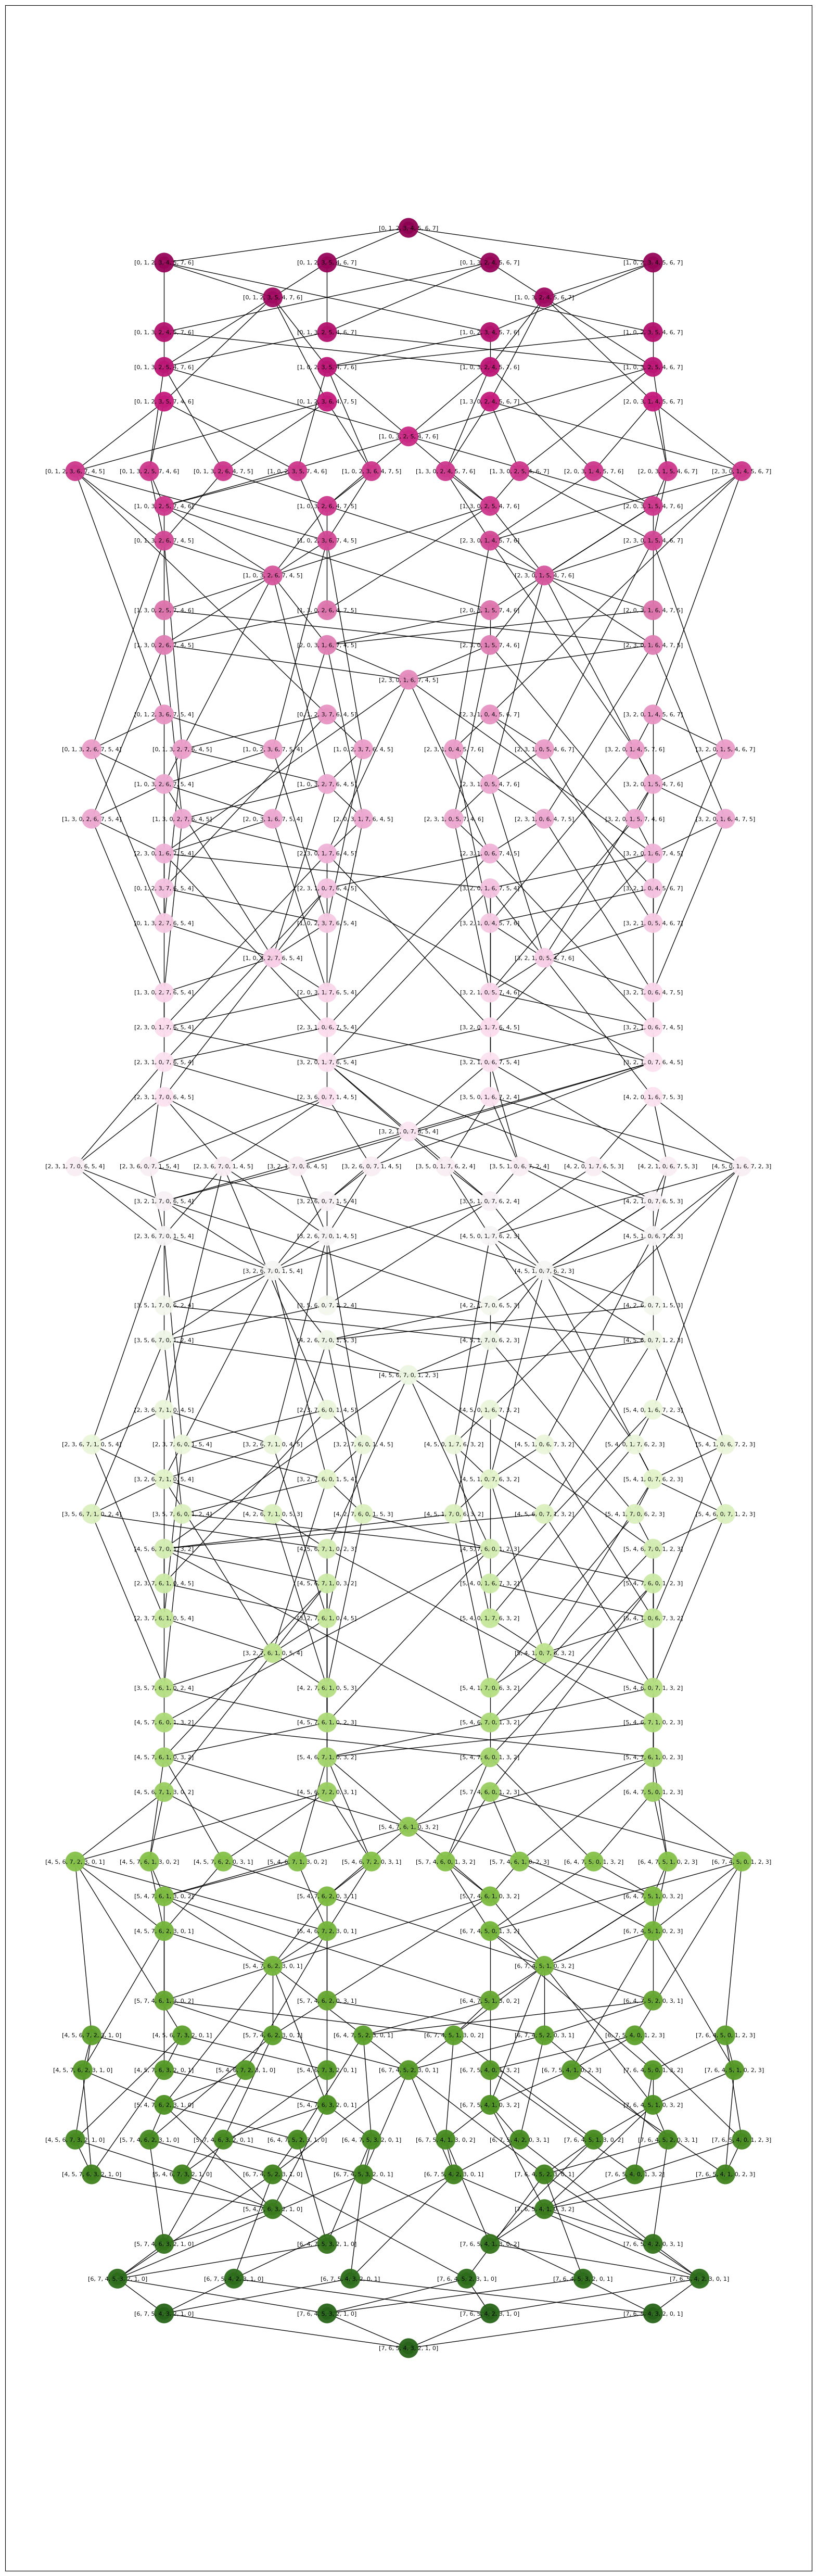

In [ ]:
# Crear el gráfico
G = nx.Graph()

# Añadir nodos
G.add_nodes_from([i for i in range(len(stable_matchings))])

# Generar vértices o líneas
edges, dict_heights = graph_edges(stable_matchings, cvr, men_prefs, women_prefs)

# Añadir líneas al gráfico
G.add_edges_from(edges)

G.add_edges_from(edges)

# Calcular posiciones exactas de los nodos
max_elem = max(len(i) for i in dict_heights.values())
positions = {}
k = 0
new_heights = list(dict_heights.keys())
new_heights.sort()
for i in range(len(new_heights)):
    x = max_elem / (1 + len(dict_heights[new_heights[i]]))
    for j in range(len(dict_heights[new_heights[i]])):
        positions[dict_heights[new_heights[i]][j]] = ((j+1) * x, k)
    k += 1

# Calcular colores (Opcional)
l = [i for i in dict_heights.keys()]
l.sort()
cmap = mpl.colormaps["PiYG"].resampled(len(l))
colors = [0 for i in range(len(stable_matchings))]
for j in range(len(l)):
    for i in dict_heights[l[j]]:
        colors[i] = cmap(1 - j / len(l))

labels = {i: [stable_matchings[i][j] for j in stable_matchings[i].keys()] for i in range(len(stable_matchings))}

# Redimensionar la figura
plt.figure(figsize=(20, 64))

# ¡Dibujar!
nx.draw_networkx(G, pos = positions, with_labels=True, labels = labels, font_size = 8, node_size = 300, node_color = colors, alpha = 0.95, linewidths = 10)

### Divirtiéndose con los diagramas de Hasse

A pesar de que se dio una cota inferior para el número máximo de posibles emparejamientos estables para una instancia de matrimonio estable, para $n \geq 0$ y $n$ potencia de $2$, note que la cantidad de emparejamientos estables para la anterior instancia la supera, y con crececs.

Incluso sabiendo eso, de acuerdo con Thurber (2002), hay una instancia de matrimonio estable de tamaño $n = 9$ con 330 emparejamientos estables. Esta instancia se representa como una matriz pseudo-latina de rankamiento de tamaño $n \times n$ (se hace la aclaración de que se intentó con este código pero no resultó en más de 13 matrimonios estables, lo cual es extraño; es muy posible que no se haya calculado bien las preferencias de acuerdo a la matriz de rankeamiento pseudo-latina). Más adelante se encuentra esto.

Ya con el código hecho y la instancia calculada, ¿qué mas se podría hacer? Se pueden hacer unas ligeras modificaciones a la instancia que ya hay: En este caso, se van a hacer permutaciones en las preferencias de los hombres. Se van a probar algunas (no todas, toma mucho tiempo) de las permutaciones de las listas de preferencias de los hombres, que consiste en tomar la lista de algún hombre $m$ e intercambiarla con la lista de un hombre $m'$.

In [ ]:
# ¡Permutaciones!
perm = list(itertools.permutations([i for i in range(n)]))
max_men_pref, max_matr = {}, {}
max_c = 0
for i in range(len(perm)//1024):
    men_prefs_2 = {j: men_prefs[perm[i][j]] for j in range(n)}
    stable_matchings = brute_force_matching(n, men_prefs_2, women_prefs)
    if len(stable_matchings) > max_c:
        max_c = len(stable_matchings)
        max_matr = stable_matchings
        max_men_pref = {i: m for i, m in men_prefs_2.items()}

heights = calculate_height(max_matr, max_men_pref, women_prefs)

cvr = cubrimiento(max_matr, max_men_pref, women_prefs)

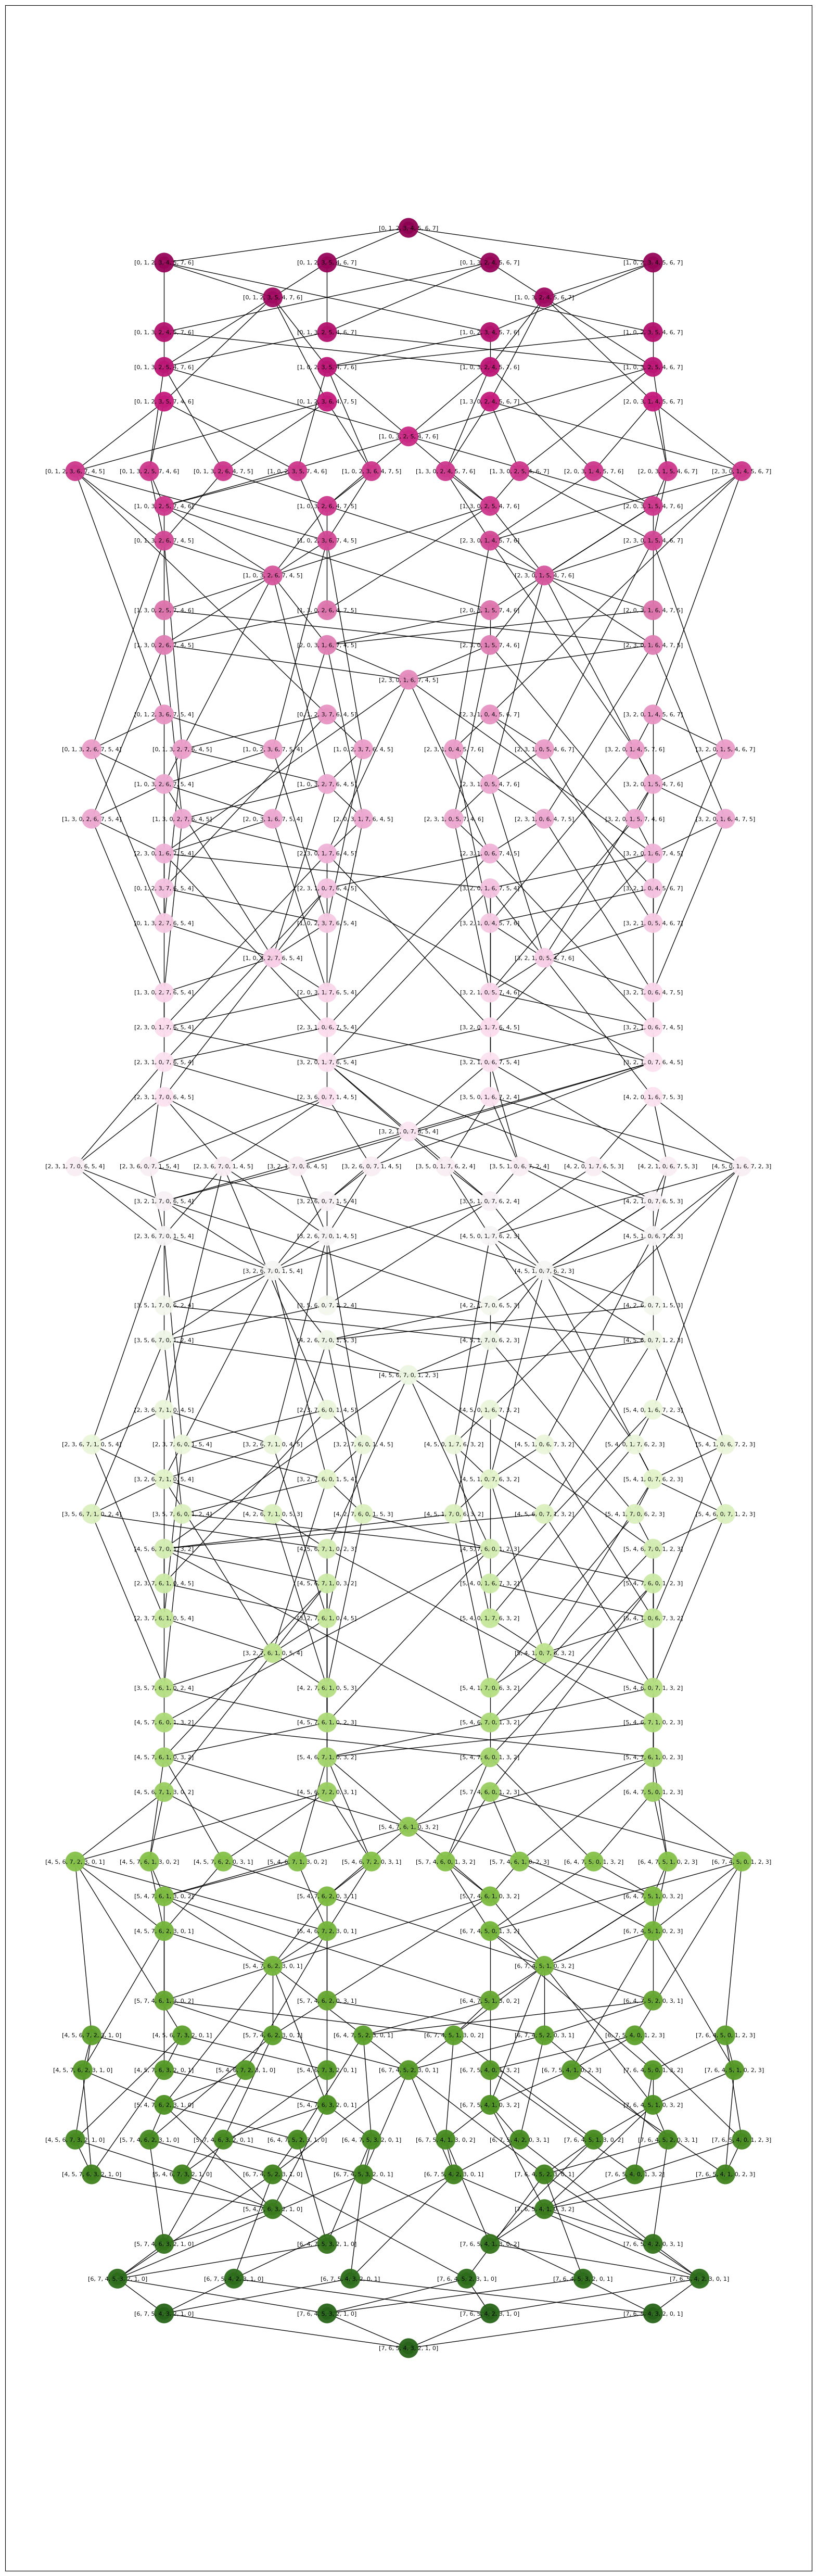

In [ ]:
# Dibujar el nuevo gráfico
G = nx.Graph()

G.add_nodes_from([i for i in range(len(max_matr))])

edges, dict_heights = graph_edges(max_matr, cvr, max_men_pref, women_prefs)

G.add_edges_from(edges)

max_elem = max(len(i) for i in dict_heights.values())
positions = {}
k = 0
new_heights = list(dict_heights.keys())
new_heights.sort()
for i in range(len(new_heights)):
    x = max_elem / (1 + len(dict_heights[new_heights[i]]))
    for j in range(len(dict_heights[new_heights[i]])):
        positions[dict_heights[new_heights[i]][j]] = ((j+1) * x, k)
    k += 1

l = [i for i in dict_heights.keys()]
l.sort()
cmap = mpl.colormaps["PiYG"].resampled(len(l))
colors = [0 for i in range(len(max_matr))]
for j in range(len(l)):
    for i in dict_heights[l[j]]:
        colors[i] = cmap(1 - j / len(l))

labels = {i: [max_matr[i][j] for j in max_matr[i].keys()] for i in range(len(max_matr))}


# Redimensionar la figura
plt.figure(figsize=(20, 64))

# ¡Dibujar!
nx.draw_networkx(G, pos = positions, with_labels=True, labels = labels, font_size = 8, node_size = 300, node_color = colors, alpha = 0.95, linewidths = 10)

A continuación, está el intento de buscar una instancia con un número aún mayor de emparejamientos estables. Esta es la matriz de rankeamiento pseudo-latina de la que habla Thurber (2001) que, de acuerdo a cálculos computaciones, tendría 330 emparejamientos estables. Este código muestra que esta instancia sólo tiene 13 emparejamientos estables.

De acuerdo con el autor, dada una matriz de rankeamiento pseudo-latina, los hombres califican a las mujeres de acuerdo al orden dado en cada fila si se colocaran todos los números del 0 al n-1. Las mujeres, en cambio, hacen lo mismo pero con las columnas y en el orden reverso. Aquí es donde hay confusión, ¿cómo en orden reverso? Quizás hace falta clarificación. Sin embargo, aún se hace el intento.

In [ ]:
men_prefs = {}
women_prefs = {}

# Preferencias de los hombres
pseudo_latin_rank_matrix = [[5, 3, 1, 4, 10, 16, 17, 18, 19],
                            [2, 1, 9, 11, 3, 12, 13, 14, 15],
                            [1, 2, 8, 10, 9, 13, 12, 15, 14],
                            [6, 8, 7, 1, 2, 14, 15, 12, 13],
                            [7, 4, 3, 2, 1, 15, 14, 13, 12],
                            [12, 13, 14, 15, 16, 1, 2, 3, 4],
                            [13, 12, 15, 14, 17, 2, 1, 4, 3],
                            [14, 15, 12, 13, 18, 3, 4, 1, 2],
                            [15, 14, 13, 12, 19, 4, 3, 2, 1]]

n = len(pseudo_latin_rank_matrix)
for i in range(n):
    men_prefs[i] = [0 for j in range(n)]
    row = pseudo_latin_rank_matrix[i]
    srtd_row = row[:]
    srtd_row.sort()
    for j in range(n):
        indice = srtd_row.index(row[j])
        men_prefs[i][j] = indice

mat = np.transpose(pseudo_latin_rank_matrix)


for i in range(n):
    women_prefs[i] = [0 for j in range(n)]
    row = list(int(j) for j in mat[i])
    srtd_row = row[:]
    srtd_row.sort()
    for j in range(n):
        indice = n - 1 - srtd_row.index(row[j])
        women_prefs[i][j] = indice

for i in range(n):
    print(men_prefs[i])

print()
for i in range(n):
    print(women_prefs[i])

print()

mostrar_preferencias(men_prefs, women_prefs, nombres_hombres, nombres_mujeres)

matches = enumerar_emparejamientos_estables(men_prefs, women_prefs)

print(f"\nTotal de emparejamientos estables encontrados: {len(matches)}")
for i, match in enumerate(matches):
    print(f"\nEmparejamiento #{i+1}")
    mostrar_emparejamiento(match, nombres_hombres, nombres_mujeres)

[3, 1, 0, 2, 4, 5, 6, 7, 8]
[1, 0, 3, 4, 2, 5, 6, 7, 8]
[0, 1, 2, 4, 3, 6, 5, 8, 7]
[2, 4, 3, 0, 1, 7, 8, 5, 6]
[4, 3, 2, 1, 0, 8, 7, 6, 5]
[4, 5, 6, 7, 8, 0, 1, 2, 3]
[5, 4, 7, 6, 8, 1, 0, 3, 2]
[6, 7, 4, 5, 8, 2, 3, 0, 1]
[7, 6, 5, 4, 8, 3, 2, 1, 0]

[6, 7, 8, 5, 4, 3, 2, 1, 0]
[6, 8, 7, 4, 5, 2, 3, 0, 1]
[8, 4, 5, 6, 7, 1, 0, 3, 2]
[6, 4, 5, 8, 7, 0, 1, 2, 3]
[4, 6, 5, 7, 8, 3, 2, 1, 0]
[0, 4, 3, 2, 1, 8, 7, 6, 5]
[0, 3, 4, 1, 2, 7, 8, 5, 6]
[0, 2, 1, 4, 3, 6, 5, 8, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]

Preferencias de los Hombres:



Preferencias de las Mujeres:



Total de emparejamientos estables encontrados: 13

Emparejamiento #1



Emparejamiento #2



Emparejamiento #3



Emparejamiento #4



Emparejamiento #5



Emparejamiento #6



Emparejamiento #7



Emparejamiento #8



Emparejamiento #9



Emparejamiento #10



Emparejamiento #11



Emparejamiento #12



Emparejamiento #13


In [ ]:
stable_matchings = matches
heights = calculate_height(stable_matchings, men_prefs, women_prefs)
cvr = cubrimiento(stable_matchings, men_prefs, women_prefs)

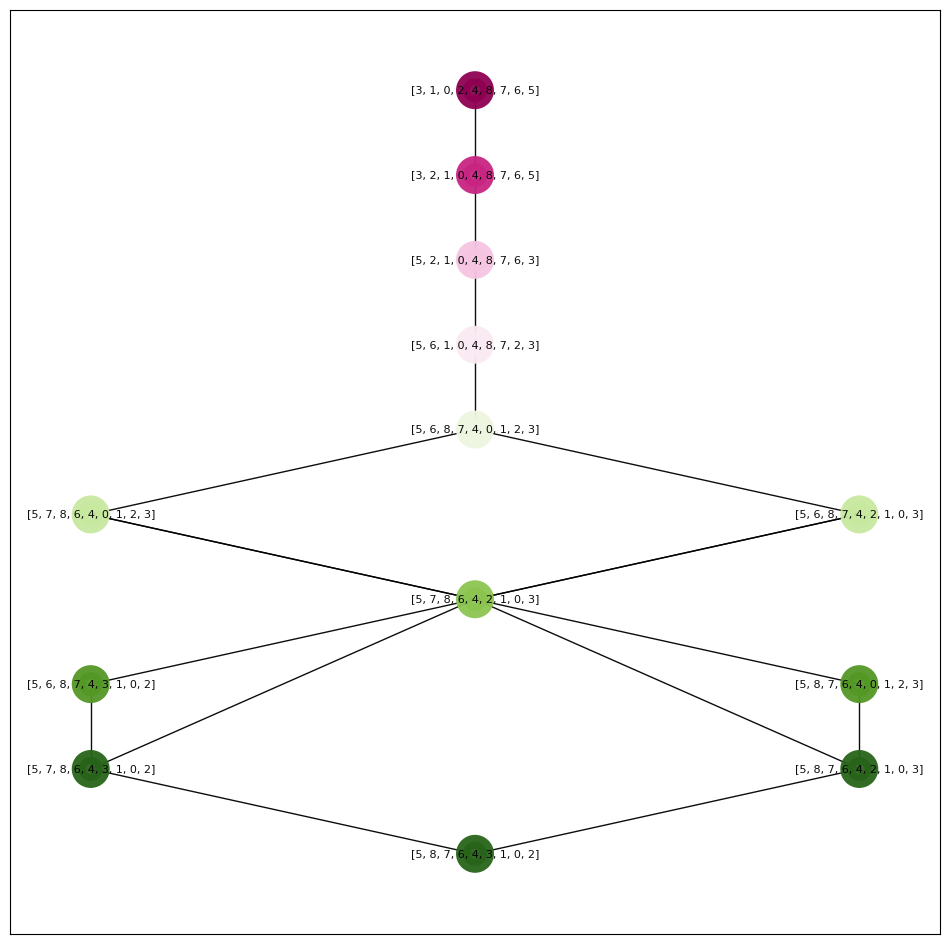

In [ ]:
# Crear el gráfico
G = nx.Graph()

# Añadir nodos
G.add_nodes_from([i for i in range(len(stable_matchings))])

# Generar vértices o líneas
edges, dict_heights = graph_edges(stable_matchings, cvr, men_prefs, women_prefs)

# Añadir líneas al gráfico
G.add_edges_from(edges)

G.add_edges_from(edges)

# Calcular posiciones exactas de los nodos
max_elem = max(len(i) for i in dict_heights.values())
positions = {}
k = 0
new_heights = list(dict_heights.keys())
new_heights.sort()
for i in range(len(new_heights)):
    x = max_elem / (1 + len(dict_heights[new_heights[i]]))
    for j in range(len(dict_heights[new_heights[i]])):
        positions[dict_heights[new_heights[i]][j]] = ((j+1) * x, k)
    k += 1

# Calcular colores (Opcional)
l = [i for i in dict_heights.keys()]
l.sort()
cmap = mpl.colormaps["PiYG"].resampled(len(l))
colors = [0 for i in range(len(stable_matchings))]
for j in range(len(l)):
    for i in dict_heights[l[j]]:
        colors[i] = cmap(1 - j / len(l))

labels = {i: [stable_matchings[i][j] for j in stable_matchings[i].keys()] for i in range(len(stable_matchings))}

# Redimensionar la figura
plt.figure(figsize=(12, 12))

# ¡Dibujar!
nx.draw_networkx(G, pos = positions, with_labels=True, labels = labels, font_size = 8, node_size = 300, node_color = colors, alpha = 0.95, linewidths = 10)

### **Biblografía**

Davey, B. A., & Priestley, H. A. (2012). Introduction to lattices and Order. University Press.

Gusfield, D., & Irving, R. W. (2003). The stable marriage problem: Structure and algorithms. Mit Press.

Thurber, E. G. (2002). Concerning the maximum number of stable matchings in the stable marriage problem. Discrete Mathematics, 248(1–3), 195–219. https://doi.org/10.1016/s0012-365x(01)00194-7

Vande Vate, J. H. (1989). Linear programming brings marital bliss. Operations Research Letters, 8(3), 147–153. https://doi.org/10.1016/0167-6377(89)90041-2